# Milestone 2: Deadline March 31th

**Author:** Gian Luca Gehwolf

**Email**: ggehwolf@student.ethz.ch

**Sample split.** Do the standard 80% / 20% training/test split using all days in the data. In addition, do a separate temporal split where the training set is the first 80% of days in the time series.

**For all machine learning models**, report performance measure in test and train samples.

**Step 2a: estimate different regression models using `X_num` and `y`** [week 3]




In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl

#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

C:\Users\gehwo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn

### Open and load file that contains `X_num` and `y`:

**Note:** Due to he Corona virus, we will only use data until Dez 2019, otherwise it would falsify the predictions. I know this means less data 
but there could not be more teewts fetched from the twitter API.

In [3]:
#open and load csv file
df_1 = pd.read_csv("./X_num_y_merged.csv").iloc[:, 1:] #only select row until end of 2019 
#df_1.reset_index(drop=True)
print(df_1.shape)

(399, 6)


In [4]:
# Sort now by Date
df_1['Date'] =pd.to_datetime(df_1.Date)
df_1 = df_1.sort_values('Date')

# Reset Index
df_1 = df_1.reset_index(drop=True)

#only select row until end of 2019
is_2019 = df_1['Date'] <= '2019-12-31'
df_1 = df_1[is_2019]
df_1

,Date,retweet count,favorite count,key hashtag count,keyword count,Close
0,2018-07-27,13,16,0,0,44.509998
1,2018-07-30,37,106,3,0,44.410000
2,2018-07-31,125,180,0,0,45.090000
3,2018-08-01,17,82,0,0,44.529999
4,2018-08-02,16,46,1,0,43.770000
...,...,...,...,...,...,...
348,2019-12-17,13,58,0,1,37.590000
349,2019-12-20,7,26,0,0,37.849998
350,2019-12-23,0,0,0,0,38.110001
351,2019-12-24,8,33,0,2,38.040001


### Exploratory Data Analysis

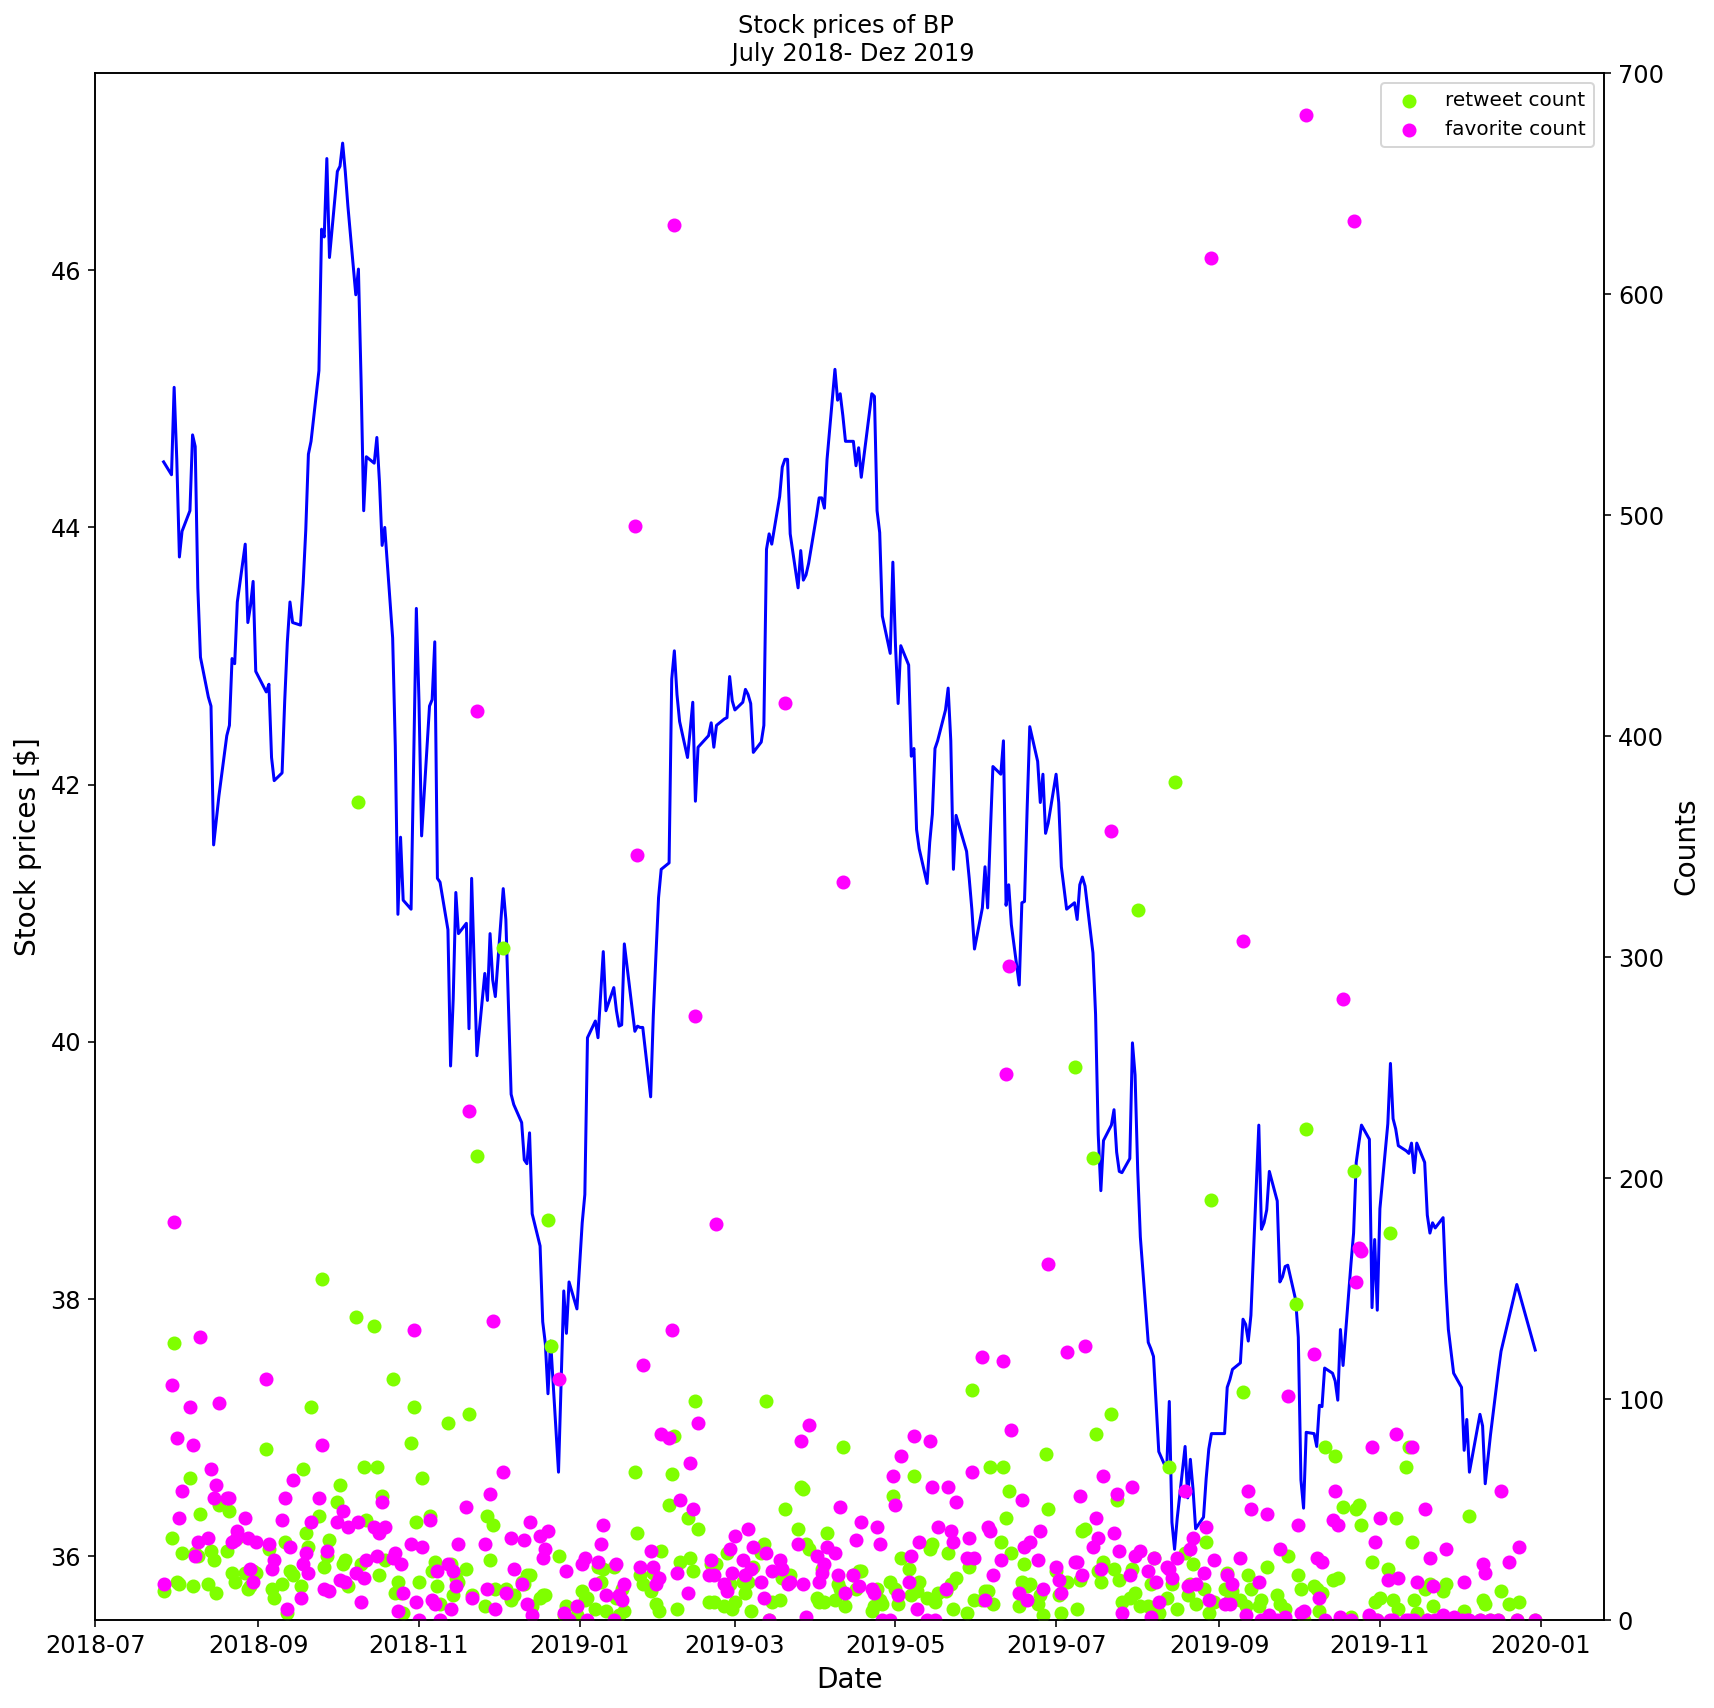

In [5]:
# plot X_num over time period of interest

fig, ax1 = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis for ax1
ax1.plot("Date", "Close", data = df_1, color= "blue")


# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Stock prices [$]",
       title="Stock prices of BP \n July 2018- Dez 2019")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax1.xaxis.set_major_formatter(date_form)

# Ensure a major tick for eg. each month using (interval=1) 
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

#add x-axise for ax2
ax2.set(ylabel = "Counts", ylim =(0, 700))
ax2.scatter("Date", "retweet count", data = df_1, color = "chartreuse")
ax2.scatter("Date", "favorite count", data = df_1, color = "fuchsia")
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

As can be seen in the figure, there is no clear trend visible  between 
retweet and favourite counts of the tweets and the y variable


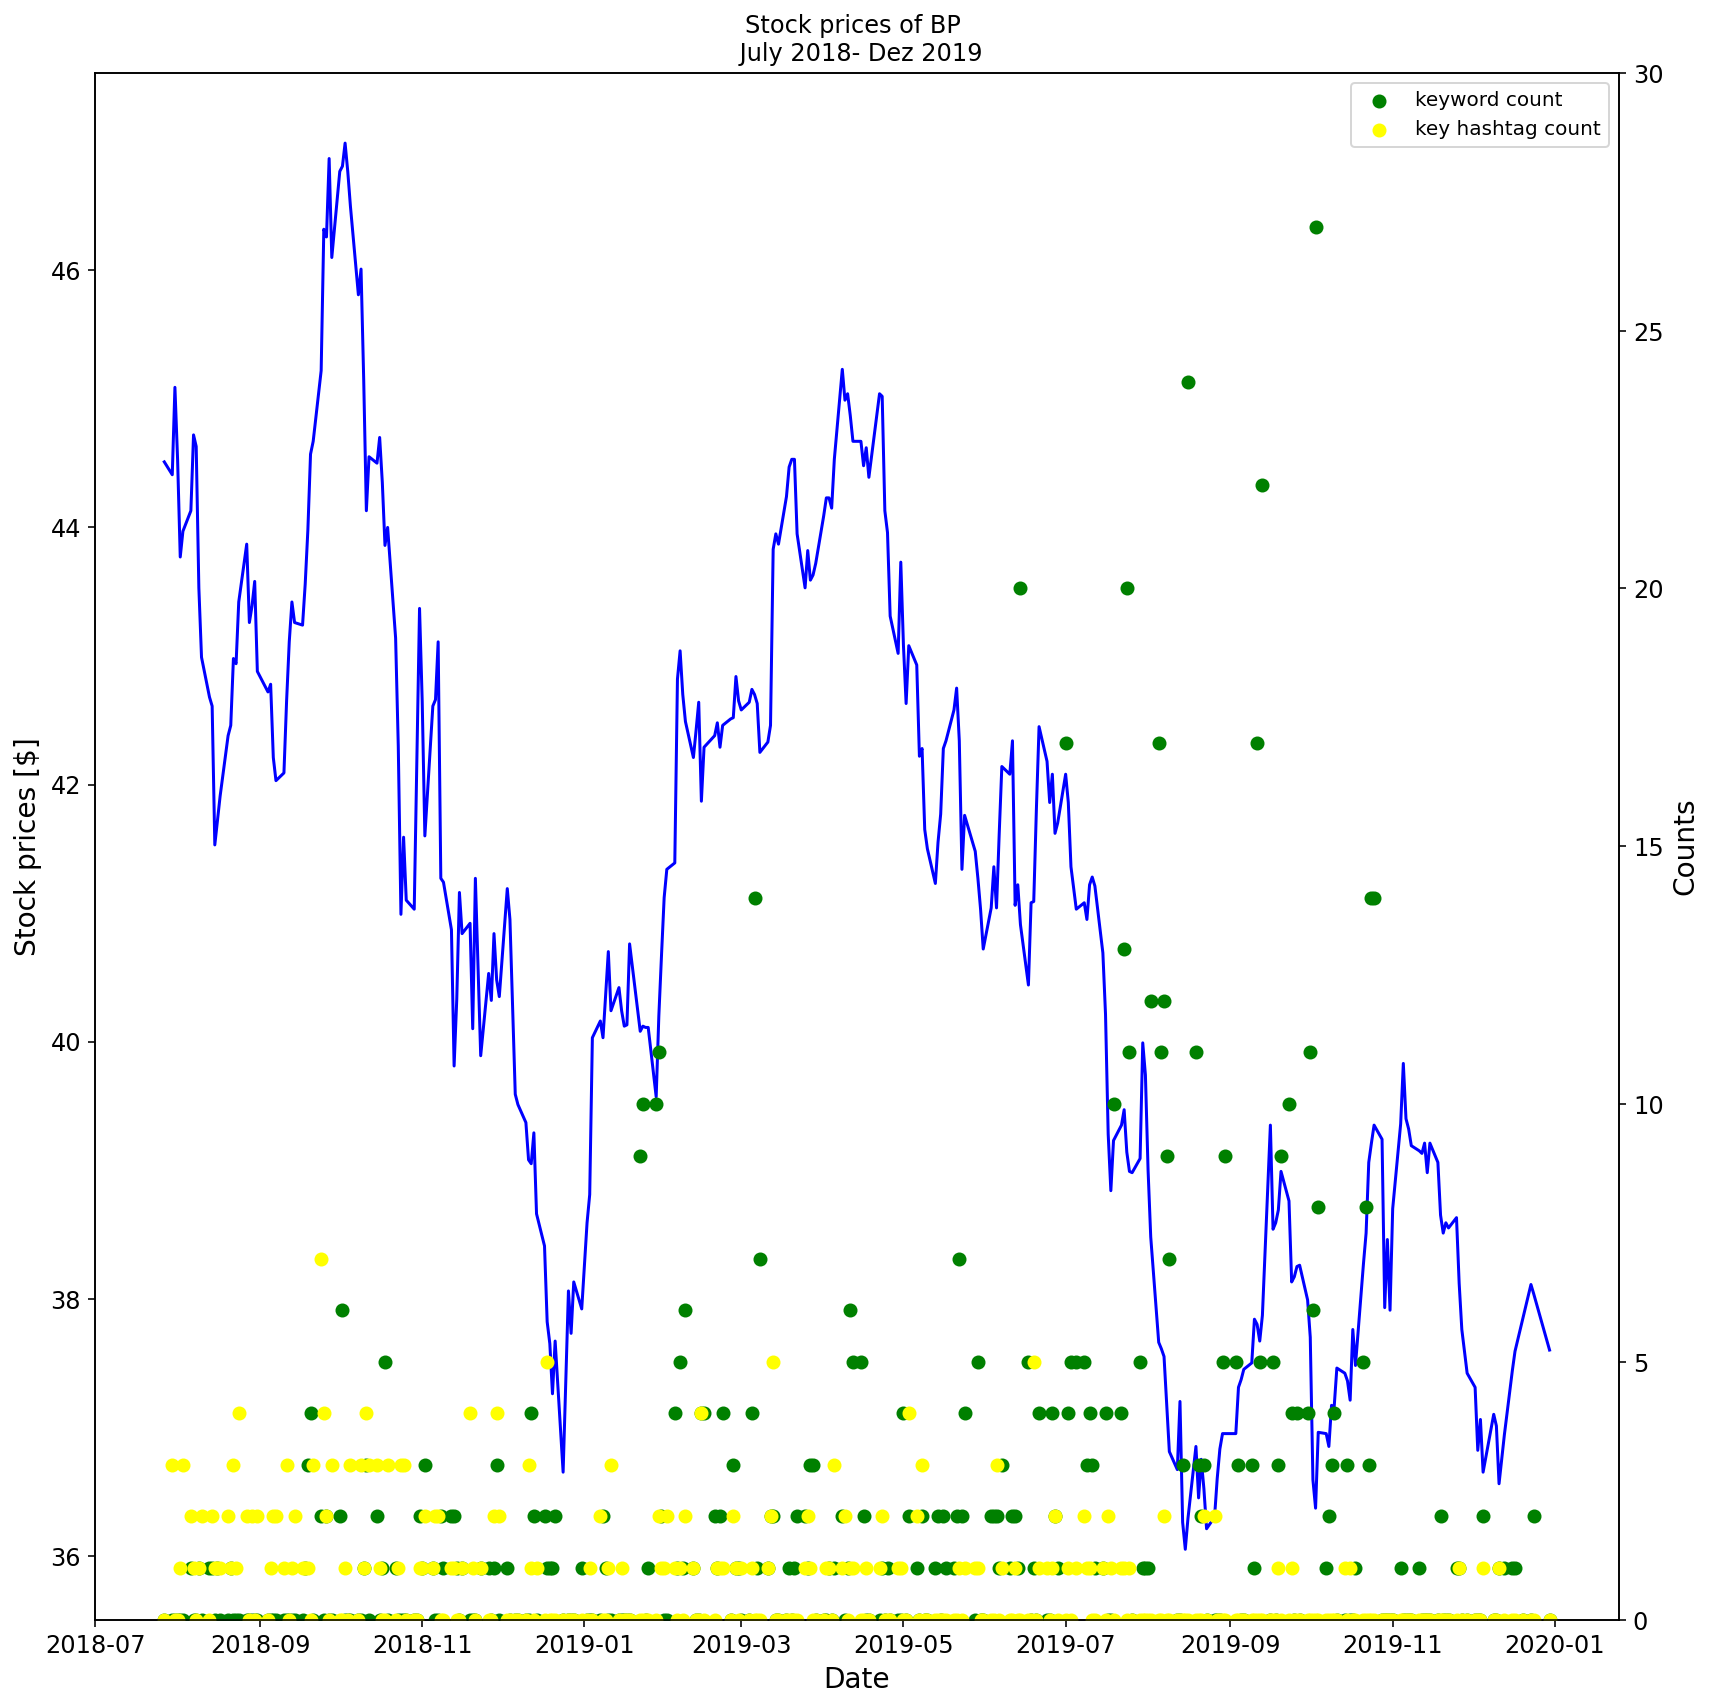

In [6]:
# plot X_num over time period of interest

fig, ax1 = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis for ax1
ax1.plot("Date", "Close", data = df_1, color= "blue")


# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Stock prices [$]",
       title="Stock prices of BP \n July 2018- Dez 2019")

# Define the date format
date_form = DateFormatter("%Y-%m")
ax1.xaxis.set_major_formatter(date_form)

# Ensure a major tick for eg. each month using (interval=1) 
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

#add x-axise for ax2
ax2.set(ylabel = "Counts", ylim = (0,30))
ax2.scatter("Date", "keyword count", data = df_1, color = "green")
ax2.scatter("Date", "key hashtag count", data = df_1, color = "yellow")
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In the figure above, it is interesting to see that green/sustainable words with 
tend to be more used in the tweets of BP when the share price is going down.


### Correlations

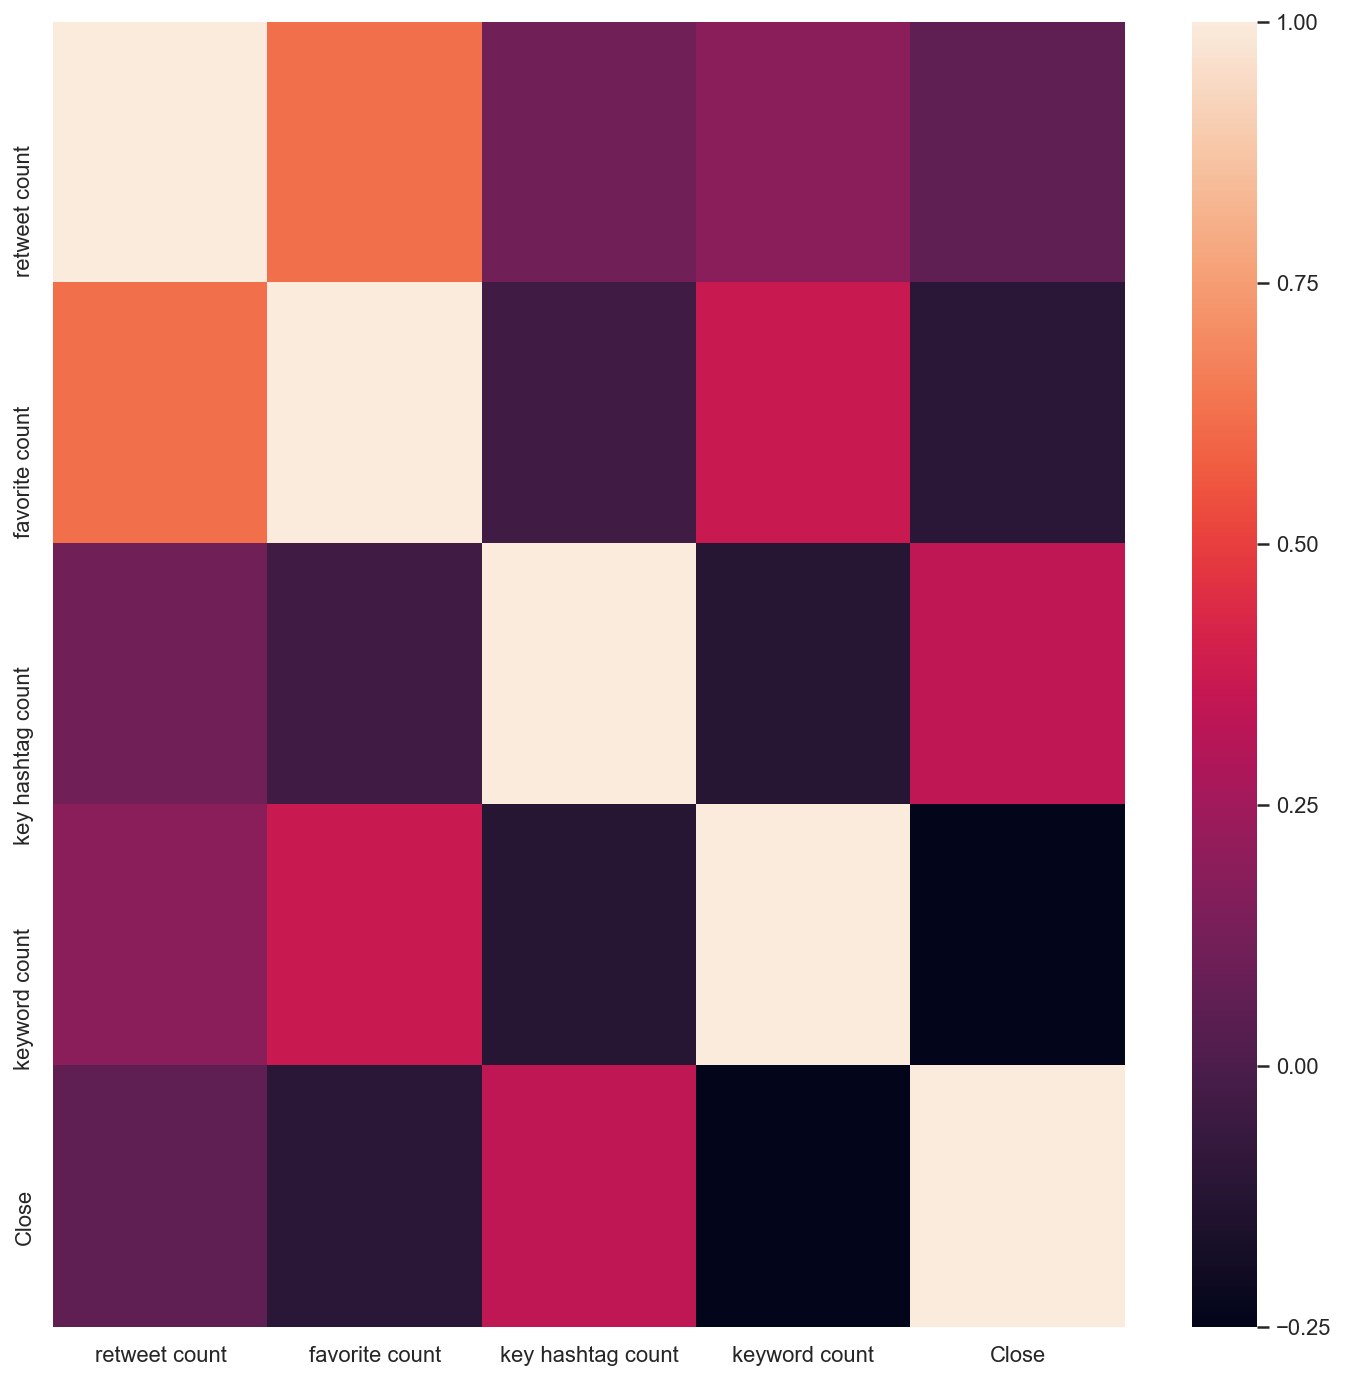

In [7]:
sns.set(rc={'figure.figsize':(12,12)})
correlation_matrix = df_1.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

The correlation map confirms the finding in the figure above where
no real trends of the `X_num` variables and the `y` are visible.

### Prepare the data for ML algorithms

In [8]:
df_1

,Date,retweet count,favorite count,key hashtag count,keyword count,Close
0,2018-07-27,13,16,0,0,44.509998
1,2018-07-30,37,106,3,0,44.410000
2,2018-07-31,125,180,0,0,45.090000
3,2018-08-01,17,82,0,0,44.529999
4,2018-08-02,16,46,1,0,43.770000
...,...,...,...,...,...,...
348,2019-12-17,13,58,0,1,37.590000
349,2019-12-20,7,26,0,0,37.849998
350,2019-12-23,0,0,0,0,38.110001
351,2019-12-24,8,33,0,2,38.040001


In [9]:
# creat y and X_num variables
y = df_1.set_index("Date").iloc[:,4]
X_num = df_1.set_index("Date").iloc[:,:4]

In [10]:
X_num

,retweet count,favorite count,key hashtag count,keyword count
Date,,,,
2018-07-27,13,16,0,0
2018-07-30,37,106,3,0
2018-07-31,125,180,0,0
2018-08-01,17,82,0,0
2018-08-02,16,46,1,0
...,...,...,...,...
2019-12-17,13,58,0,1
2019-12-20,7,26,0,0
2019-12-23,0,0,0,0


In [11]:
y

Date
2018-07-27    44.509998
2018-07-30    44.410000
2018-07-31    45.090000
2018-08-01    44.529999
2018-08-02    43.770000
                ...    
2019-12-17    37.590000
2019-12-20    37.849998
2019-12-23    38.110001
2019-12-24    38.040001
2019-12-30    37.599998
Name: Close, Length: 353, dtype: float64

### Split train test sets

**Pure ramdomness** of the sampling method 

use: `train_test_split` 



In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_num, y,test_size=0.2, random_state=1)

NameError: name 'X_num' is not defined

In [ ]:
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

**Separate temporal split** where the training set is the first 80% of days in the time series

In [14]:
# create benchmark
bench = int(len(y)*0.8) # 80% of the data

# for the y variable
y_train2 = y[:bench]
y_test2 = y[bench:]

# for the X_num variable
X_train2 = X_num[:bench]
X_test2 = X_num[bench:]

#### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)
- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# for random splitting
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# for temporal split
scaler2 = StandardScaler().fit(X_train2)
X_train2_scaled = scaler.transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

### Select and Train a Model 

#### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Randomized splitting:

In [17]:
# use non standardized data for randomized splitting:
lin_reg.fit(X_train, y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, y_train), 2)))

R-squared for training dataset:0.17


In [18]:
# use standardized data for randomized splitting: 
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.17


Temporal splitting:

In [19]:
# use non standardized data for temporal split:
lin_reg.fit(X_train2, y_train2)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train2, y_train2), 2)))

R-squared for training dataset:0.14


In [20]:
# use standardized data for temporal split:
lin_reg.fit(X_train2_scaled, y_train2)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train2_scaled, y_train2), 2)))

R-squared for training dataset:0.14


Coefficients for linear regression:

In [21]:
features = list(X_num.columns)

print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'retweet count': 0.27, 'favorite count': -0.28, 'key hashtag count': 0.46, 'keyword count': -0.65}


**Metrics/ error measures:**

**Mean squared error:**

Here we replace the absolute difference by its squared difference. Squaring also insures positive differeces.


<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean squared error</strong> is defined as 



$$
\frac{1}{n} \left(\, (y_1 - \hat{y}_1)^2 \, + \, (y_2 - \hat{y}_2)^2 \, \, \ldots \,+ \,(y_n - \hat{y}_n)^2 \,\right)
$$



In [22]:
from sklearn.metrics import mean_squared_error

Randomized splitting:

In [23]:
# in-sample performance
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMS: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMS: 48.205986435742126


In [24]:
# out-of-sample performance
y_test_pred = lin_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

RMS: 38.20031598136646


Temporal splitting:

In [25]:
# in-sample performance
y_train2_pred = lin_reg.predict(X_train2)
train2_mse = mean_squared_error(y_train2, y_train2_pred)
train2_rmse = np.sqrt(train2_mse)
print("RMS: %s" % train2_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMS: 47.983345175257284


In [26]:
# out-of-sample performance
y_test2_pred = lin_reg.predict(X_test2)        
test2_mse = mean_squared_error(y_test2, y_test2_pred)
test2_rmse = np.sqrt(test2_mse)
print("RMS: %s" % test2_rmse) 

RMS: 39.29788464620236


**Explained variance and $r^2$-score:**

The $r^2$-score corresponds to **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 
It takes values in the range $0 .. 1$. The name within `scikit-learn` is `r2`. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>$R^2$</strong> is defined as 

$$
R^2= 1-\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

</div>


In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

Randomized splitting:

In [28]:
r2=round(r2_score(y_test, y_test_pred), 2)
print("R2: %s" % r2)

R2: -230.49


In [29]:
exp_var = round(explained_variance_score(y_test,y_test_pred),2)
print("Explained variance: %s" % exp_var)

Explained variance: -217.58


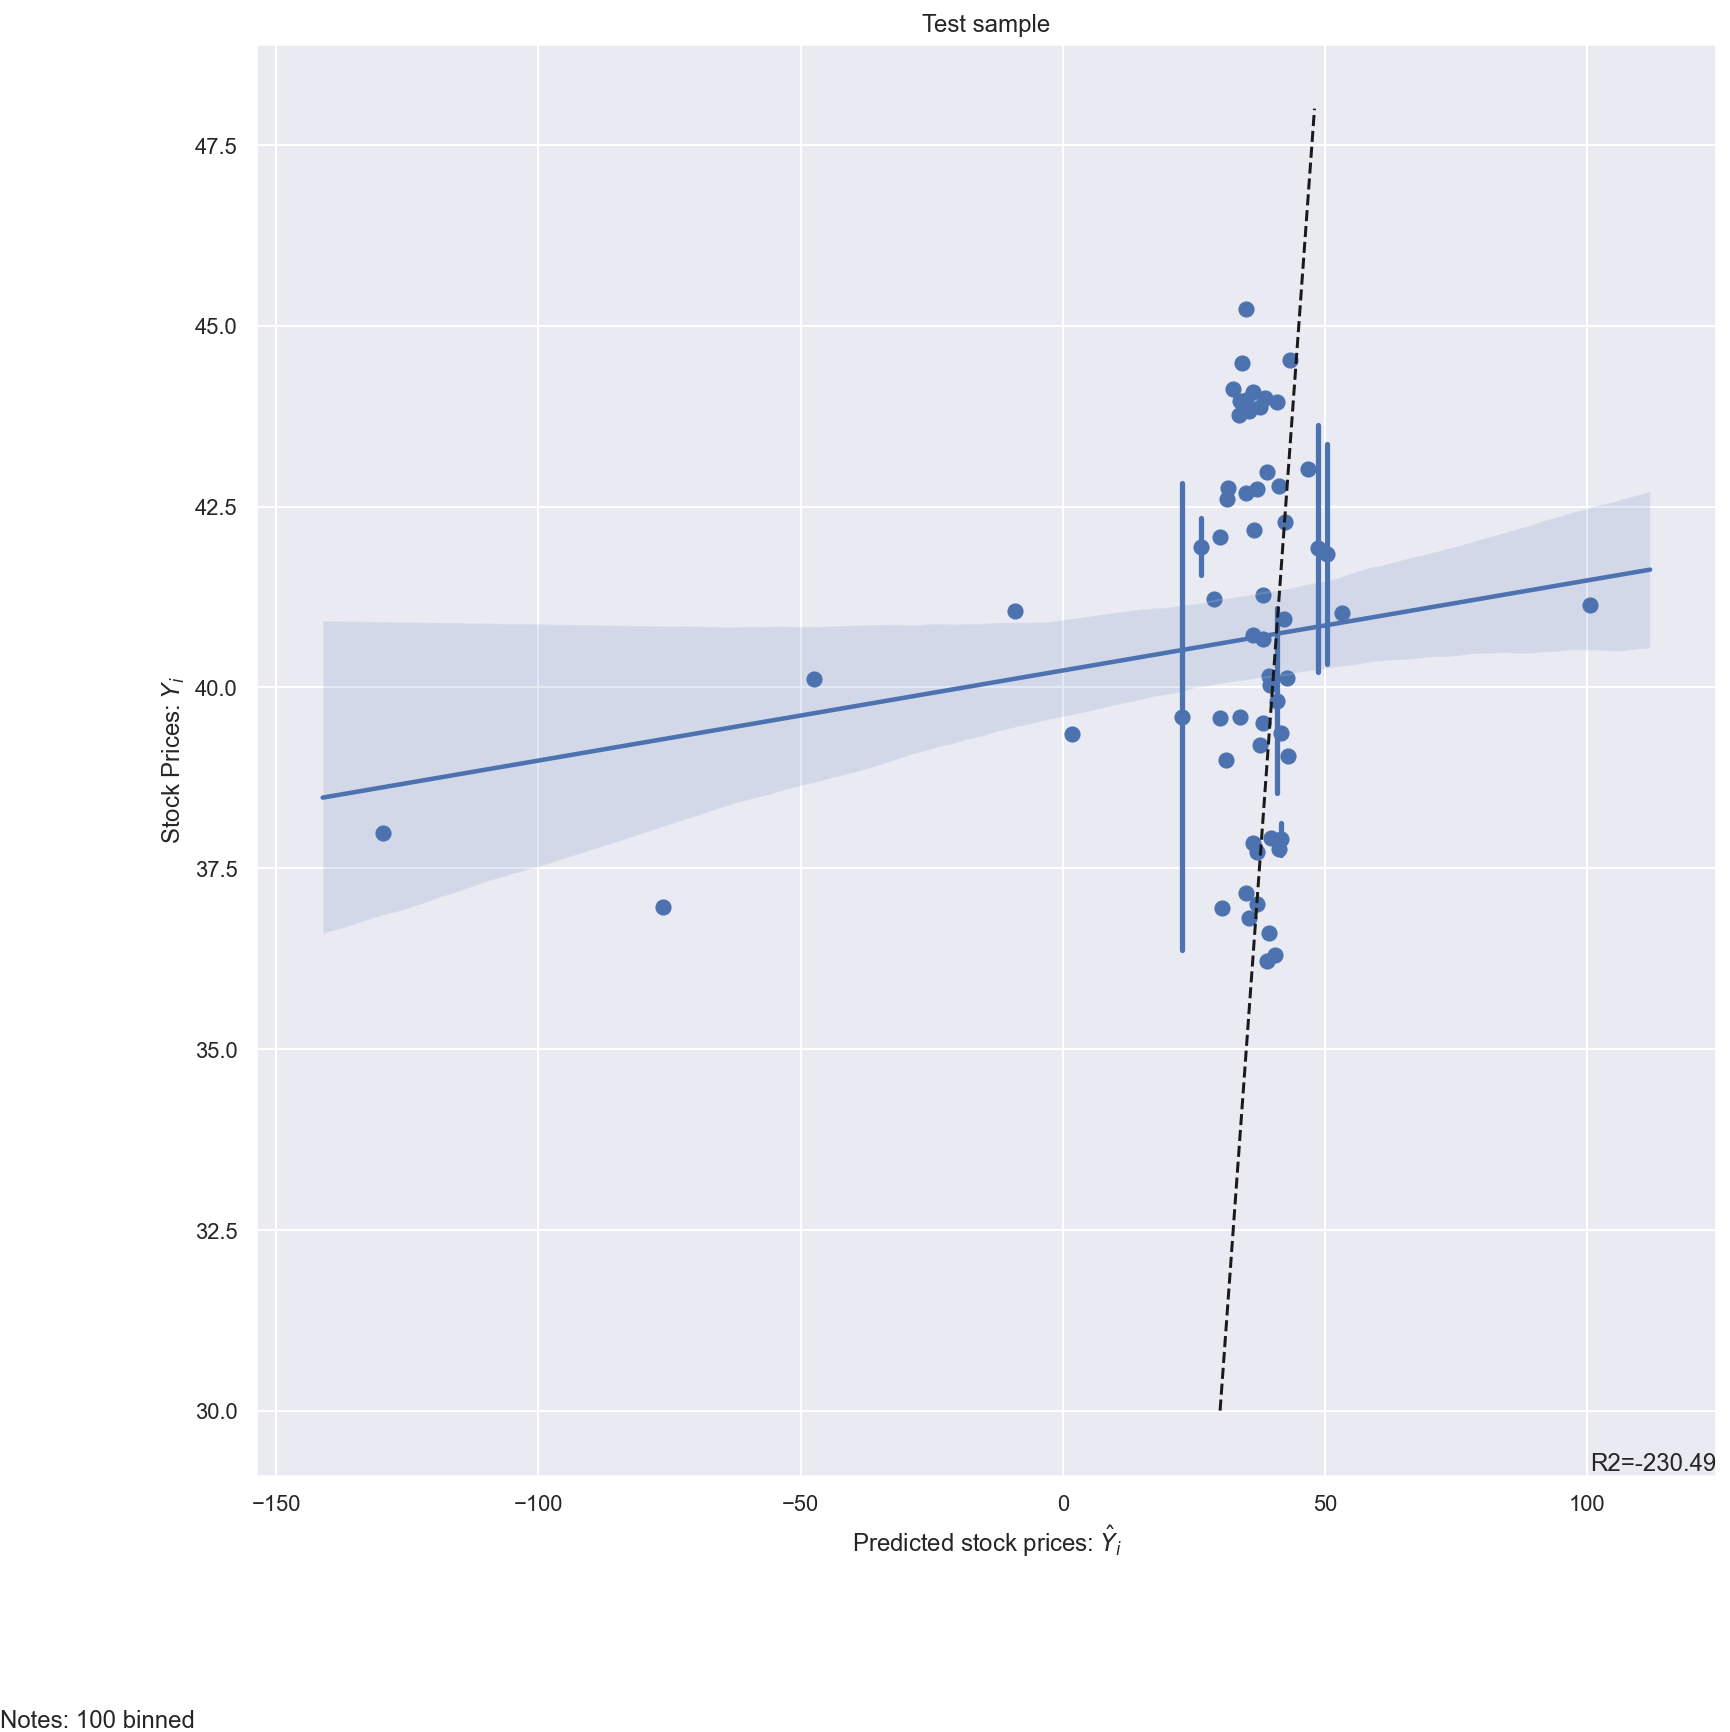

In [30]:
# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

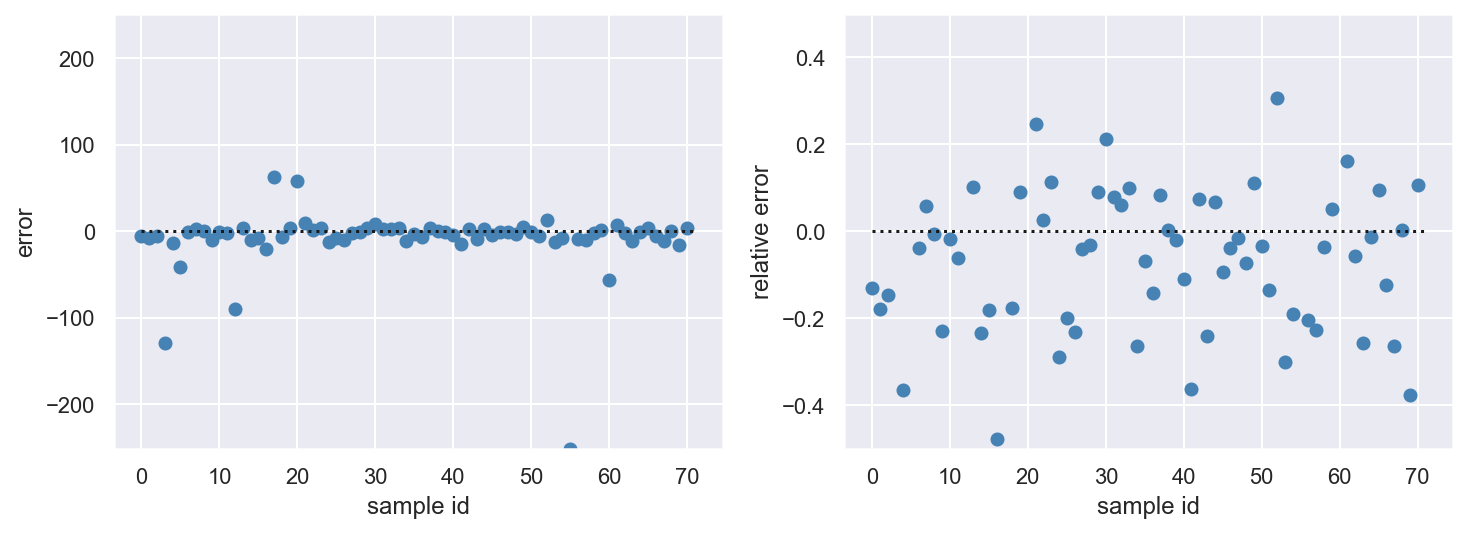

In [31]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)

Temporal splitting:

In [32]:
r2=round(r2_score(y_test2, y_test2_pred), 2)
print("R2: %s" % r2)

R2: -2059.7


In [33]:
exp_var = round(explained_variance_score(y_test2,y_test2_pred),2)
print("Explained variance: %s" % exp_var)

Explained variance: -1950.34


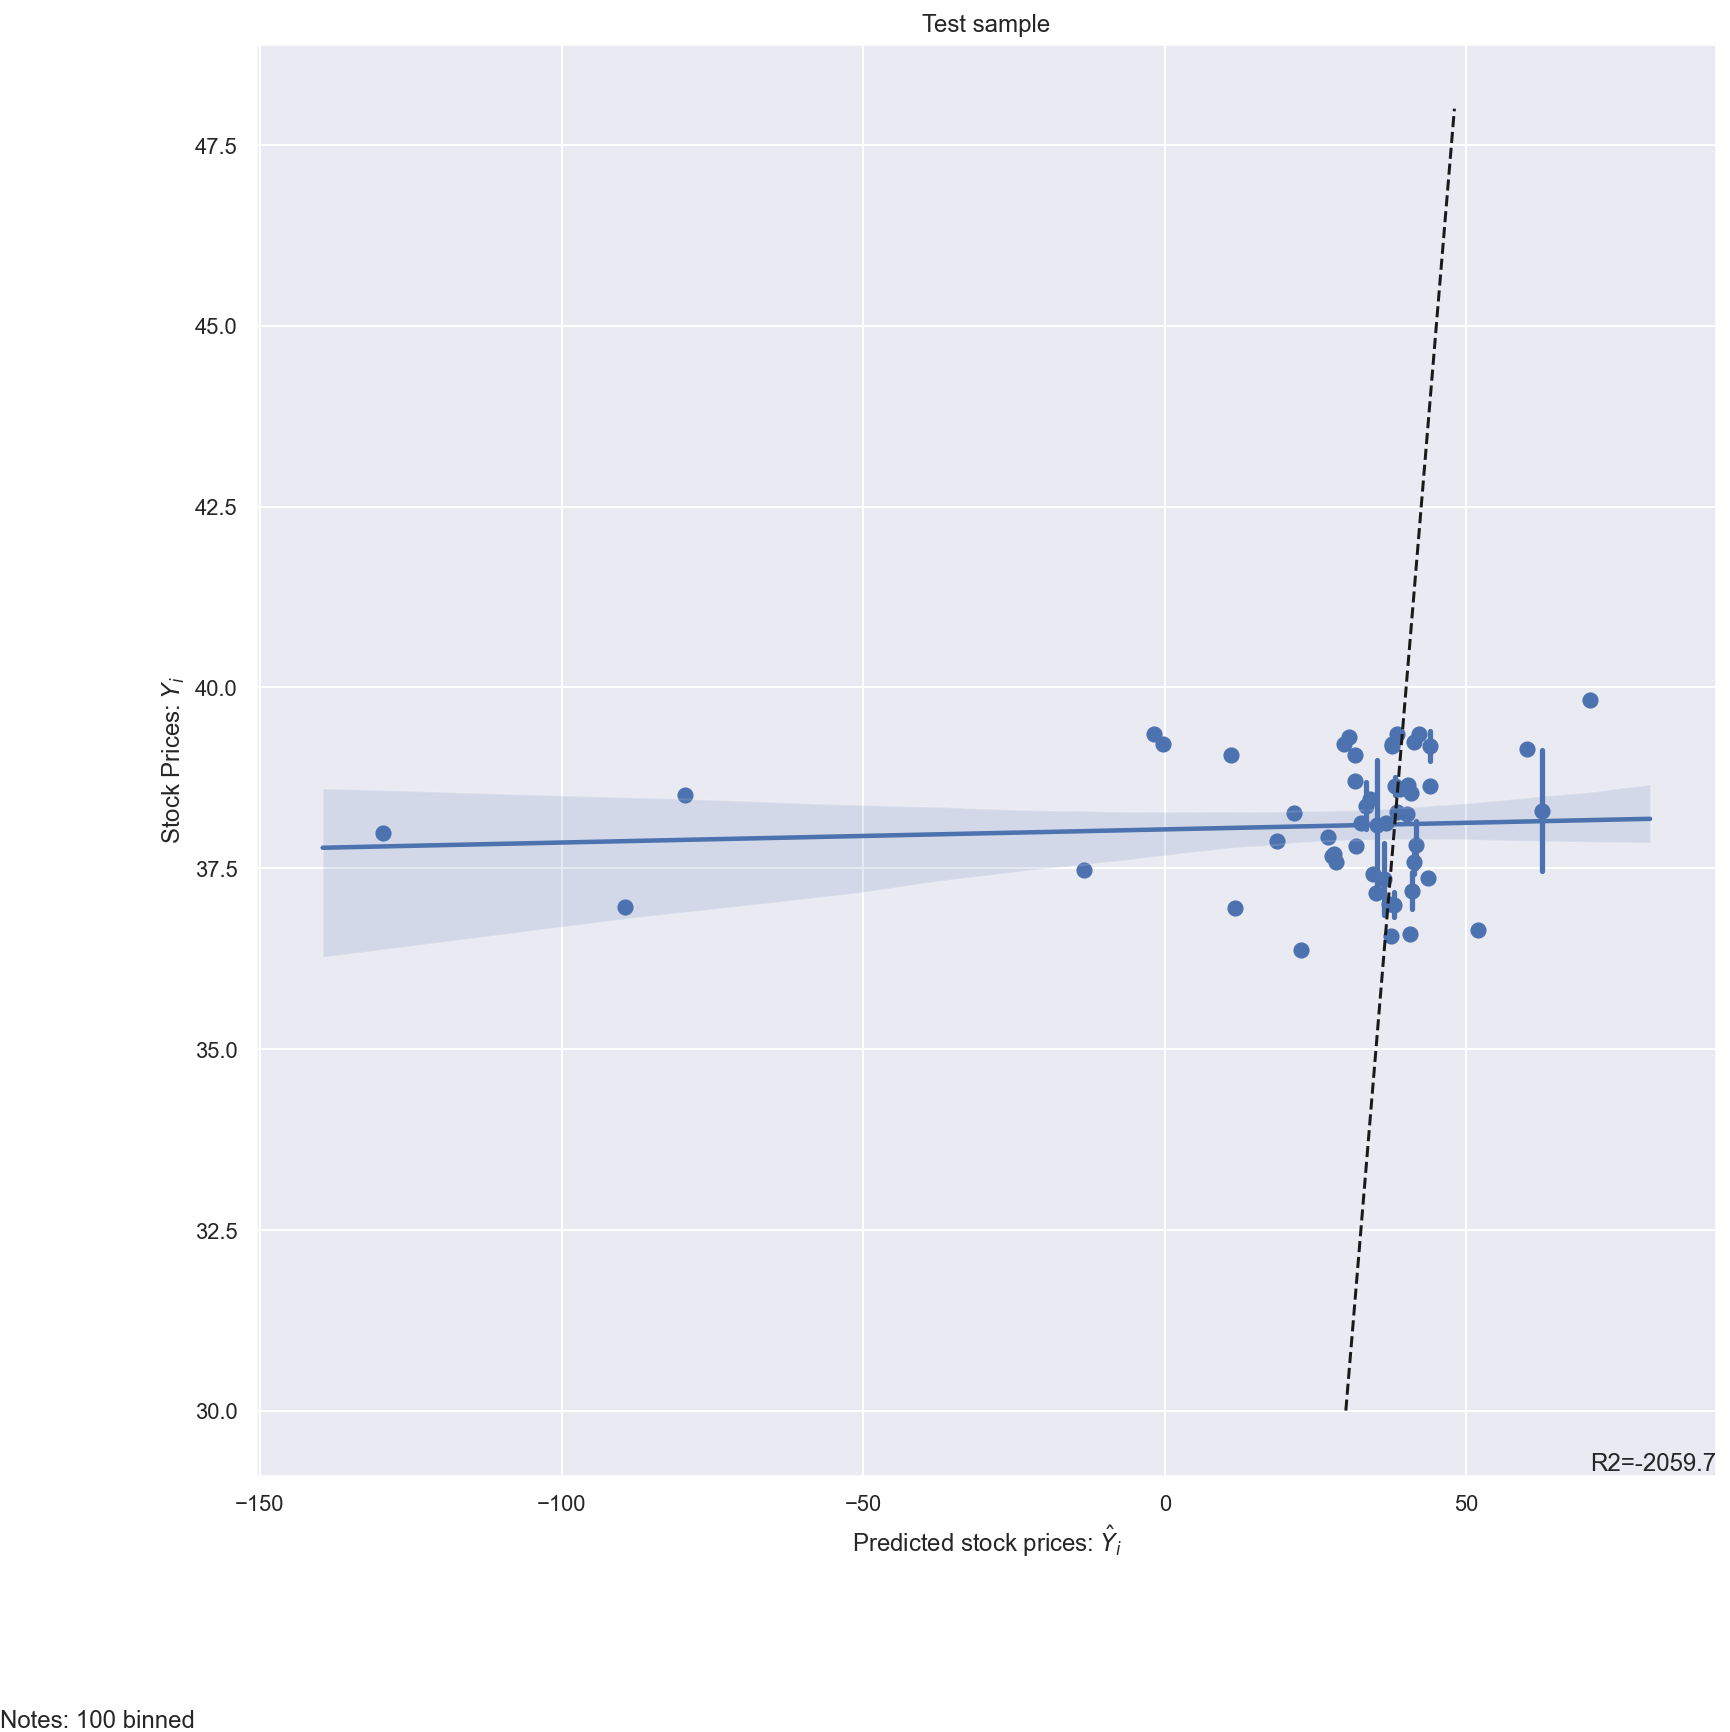

In [34]:
# Regplot
g=sns.regplot(x= y_test2_pred, y=y_test2, x_bins= 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

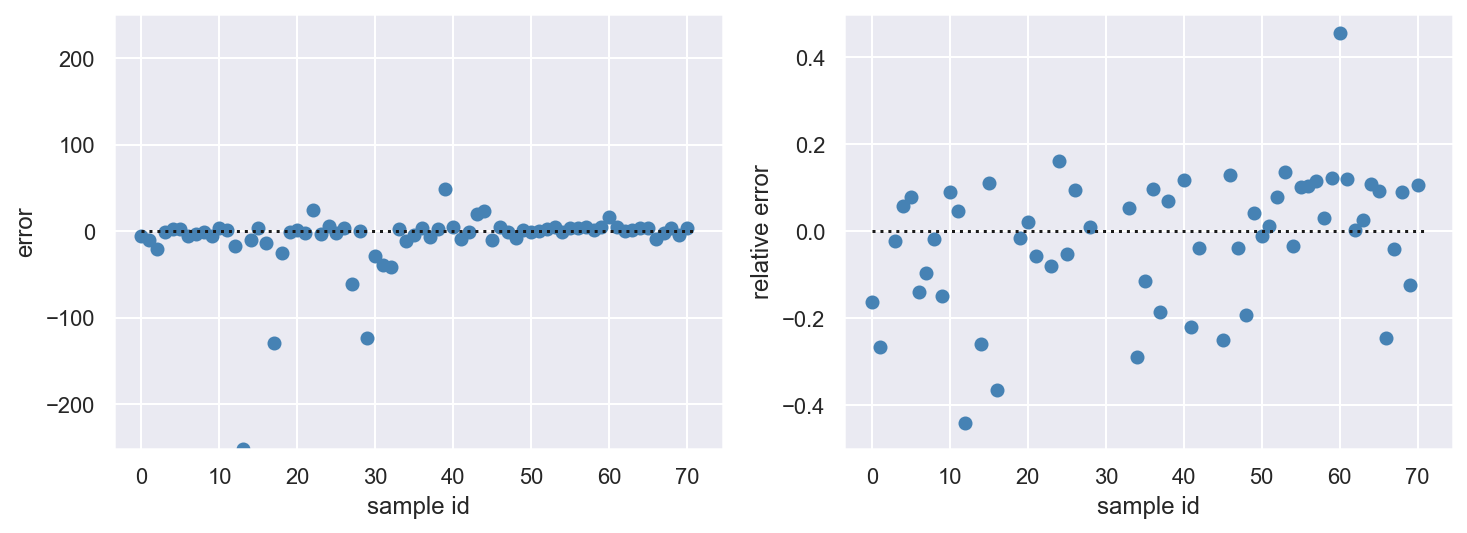

In [35]:
#Let us plot how good given and predicted values match on the training data set 
plot_fit_quality(y_test2, y_test2_pred)

#### Ridge Regression

Randomized splitting:

In [36]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1)       
ridge_reg.fit(X_train, y_train)

y_train_pred=ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 4)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 4)) 

train RMS: 48.205986435742126
test RMS: 2.3011382450007605
train R2: 0.1688
test R2: 0.16


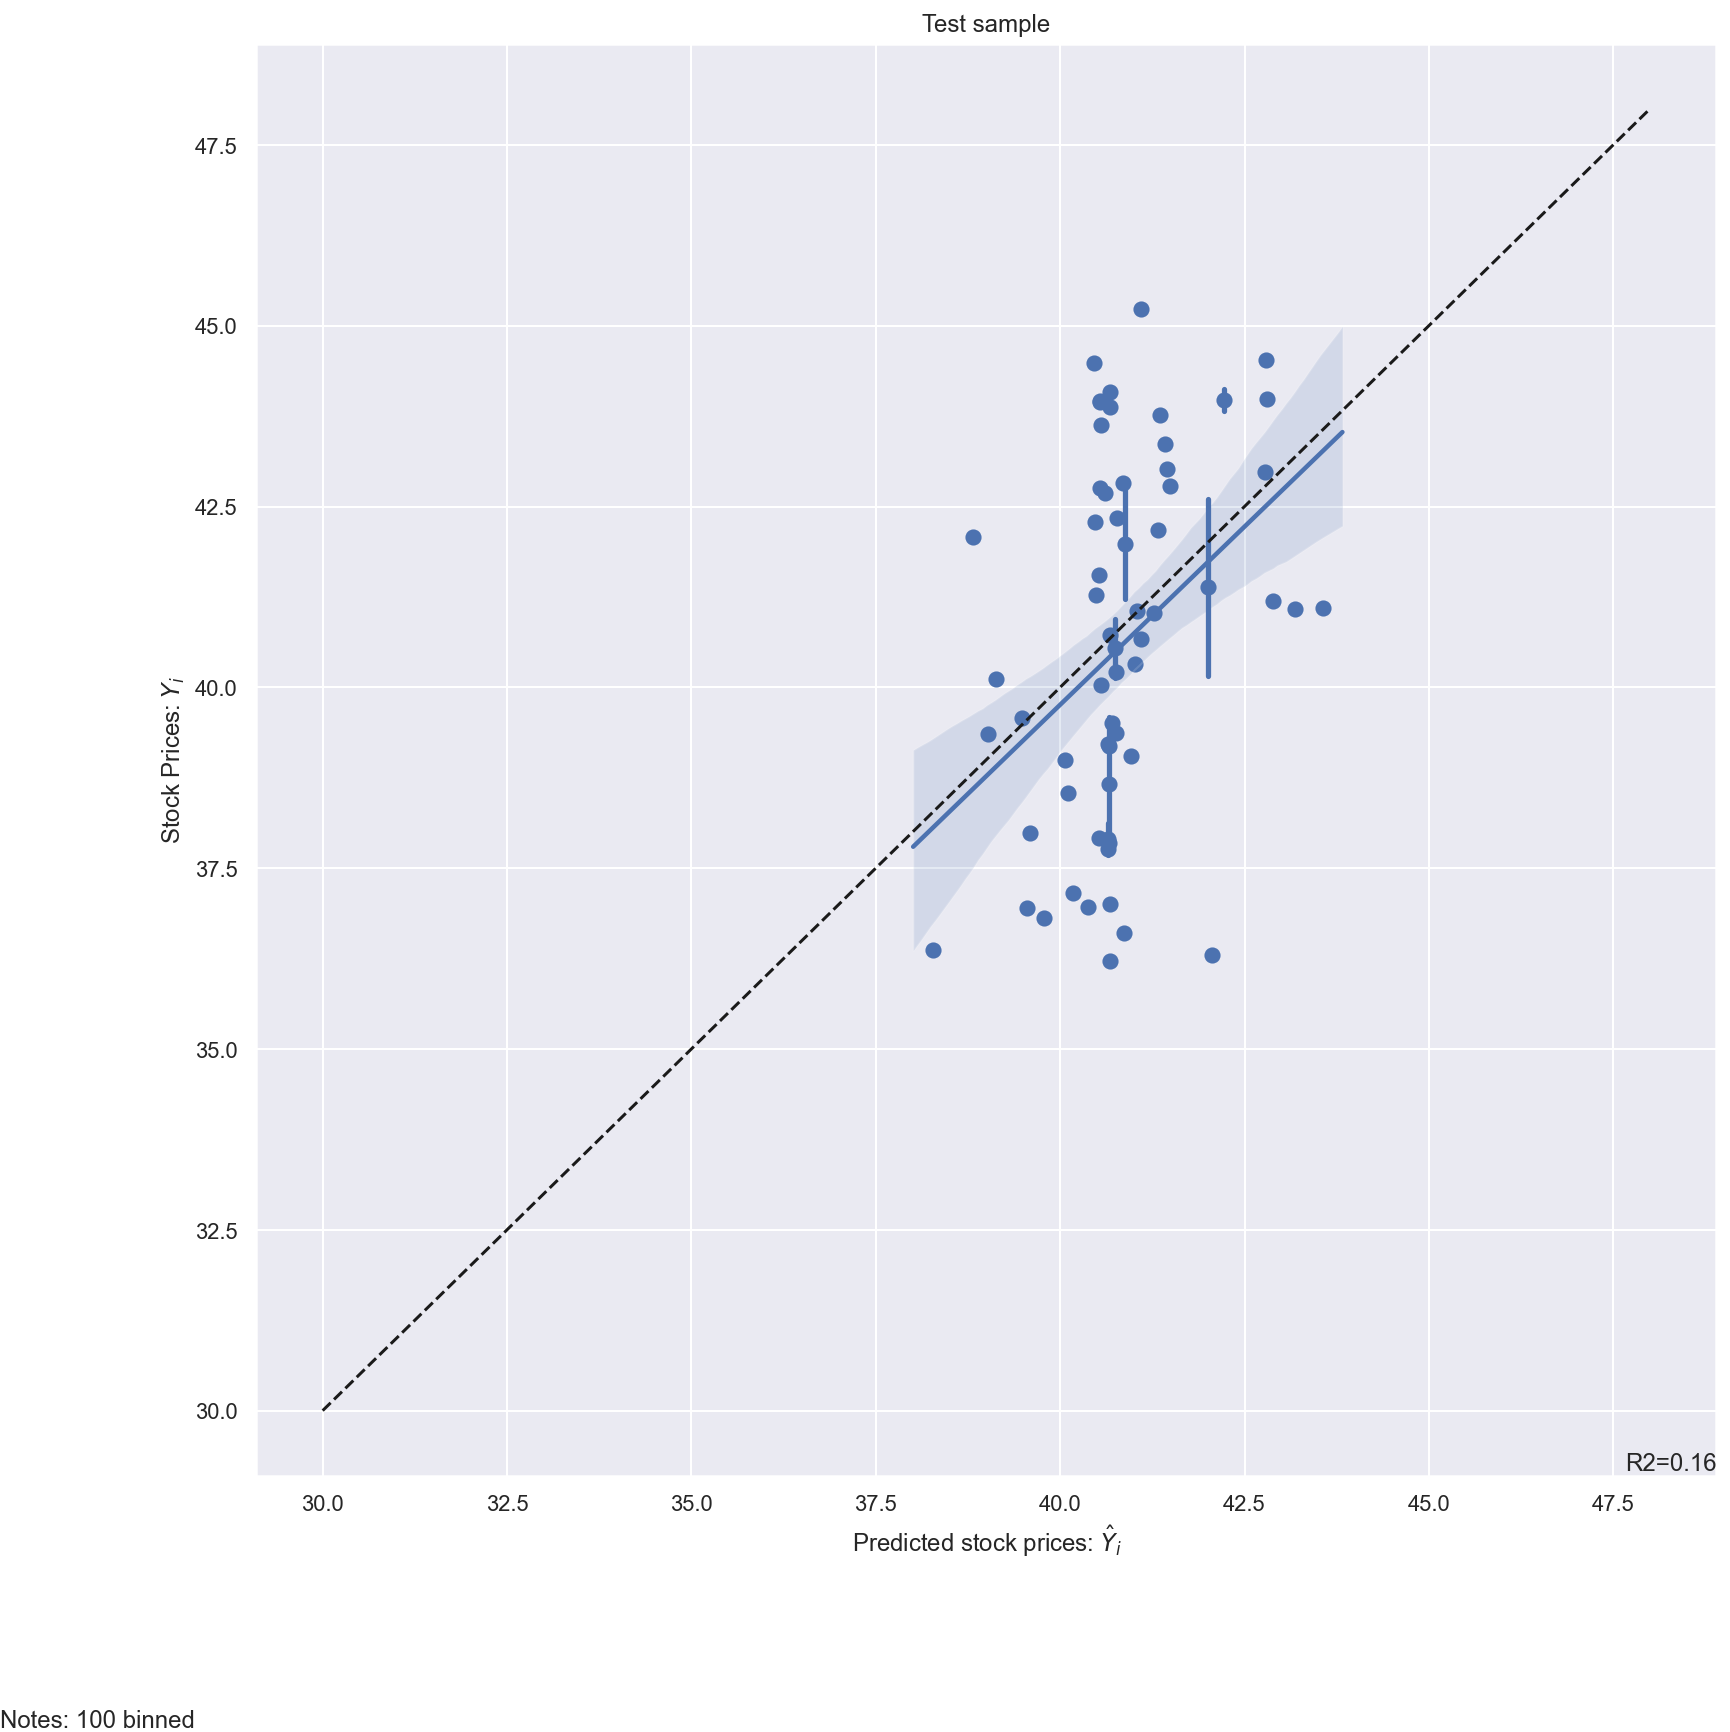

In [37]:
r2 = r2=round(r2_score(y_test, y_test_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

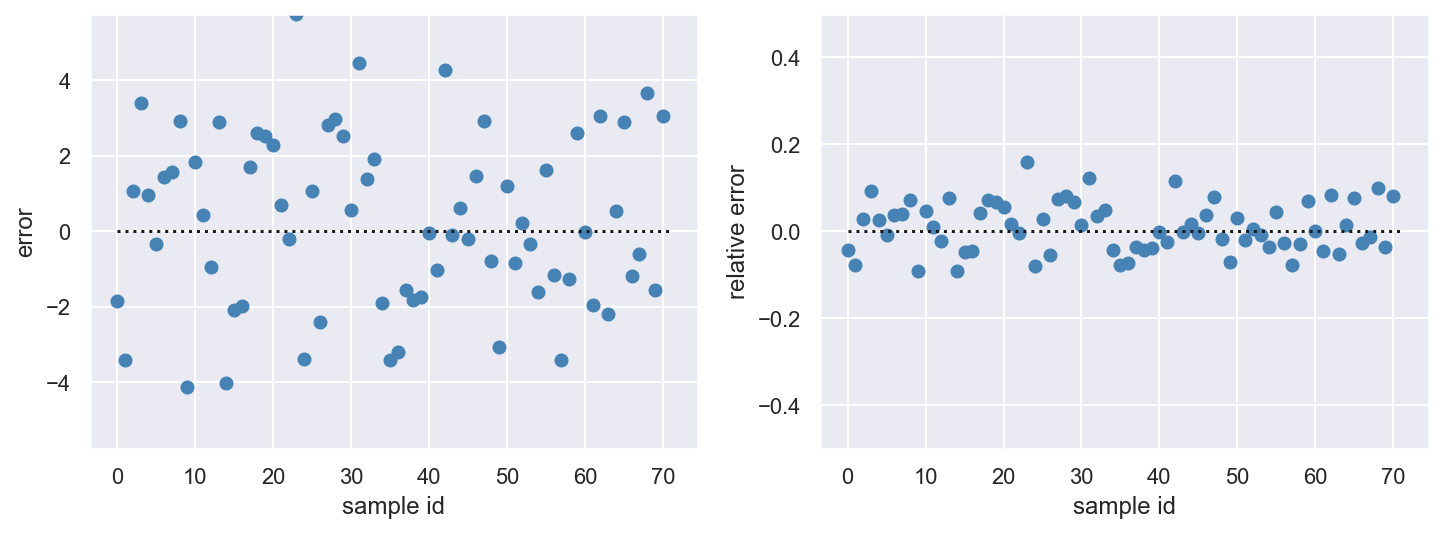

In [38]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test, y_test_pred)

Temporal splitting:

In [39]:
ridge_reg.fit(X_train2, y_train2)

y_train2_pred = ridge_reg.predict(X_train2)
y_test2_pred = ridge_reg.predict(X_test2)        
test2_mse = mean_squared_error(y_test2, y_test2_pred)
test2_rmse = np.sqrt(test2_mse)
print("train RMS: %s" % train2_rmse) 
print("test RMS: %s" % test2_rmse) 
print("train R2: %s" % round(r2_score(y_train2, y_train2_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test2, y_test2_pred), 2)) 

train RMS: 47.983345175257284
test RMS: 3.3017392723960466
train R2: 0.14
test R2: -13.55


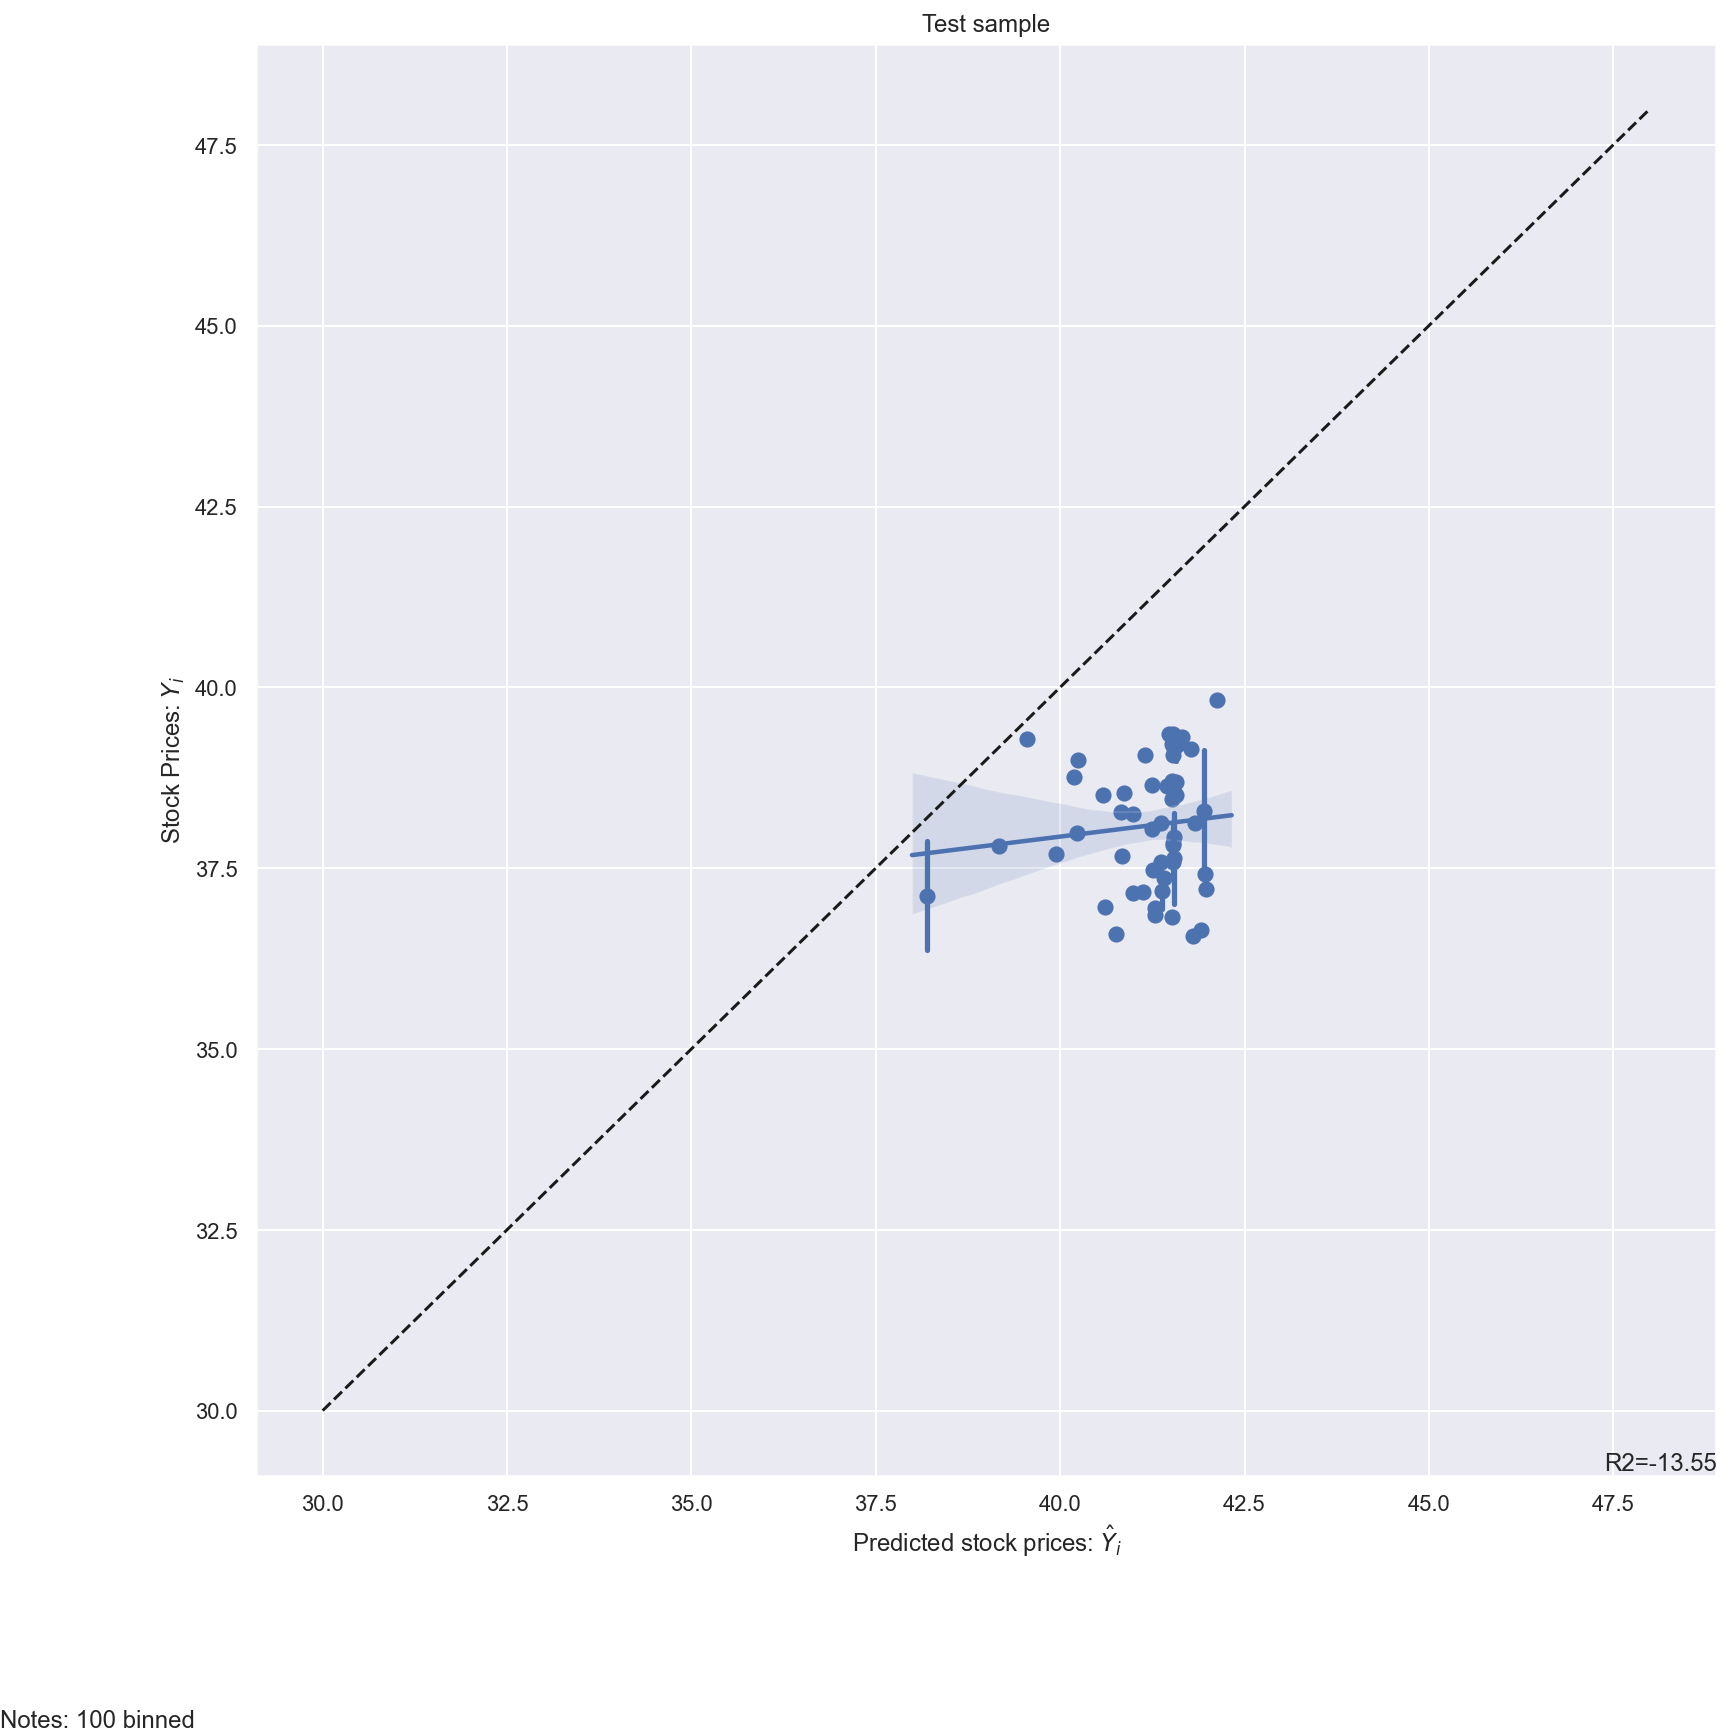

In [40]:
r2 = r2=round(r2_score(y_test2, y_test2_pred), 2)

# Regplot
g=sns.regplot(x= y_test2_pred, y=y_test2, x_bins= 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

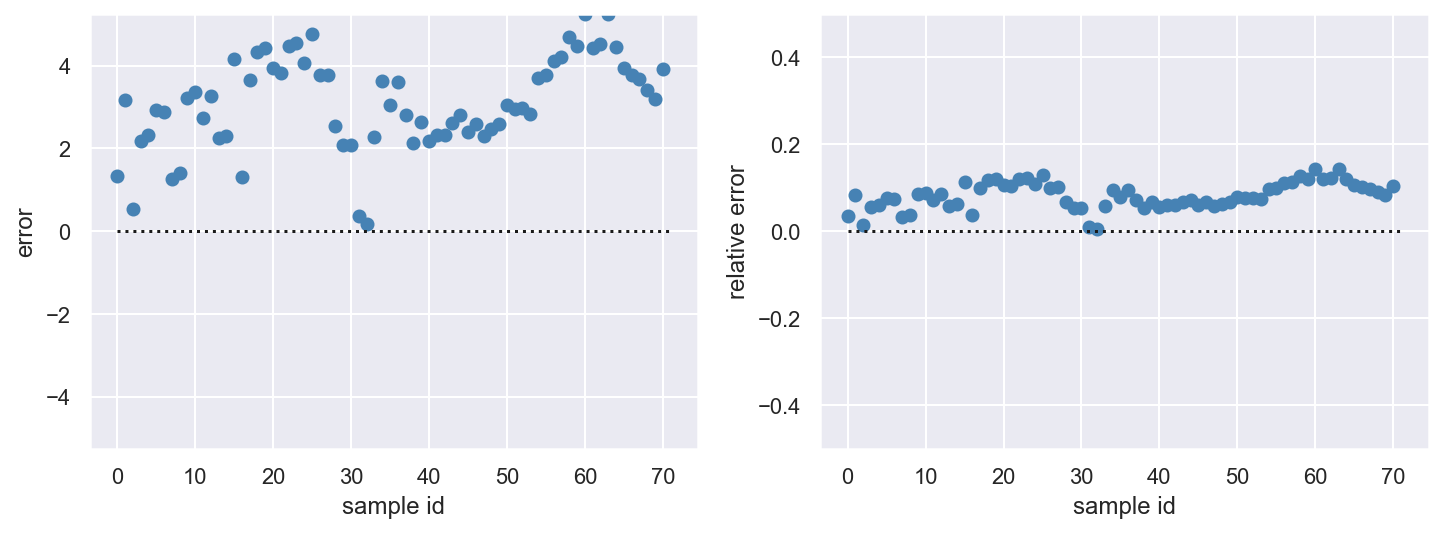

In [41]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test2, y_test2_pred)

#### Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)

Randomized splitting:

In [43]:
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_test_pred = lin_reg.predict(X_test_poly)
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

test RMS: 2.272064998273917
train R2: 0.17
test R2: 0.18


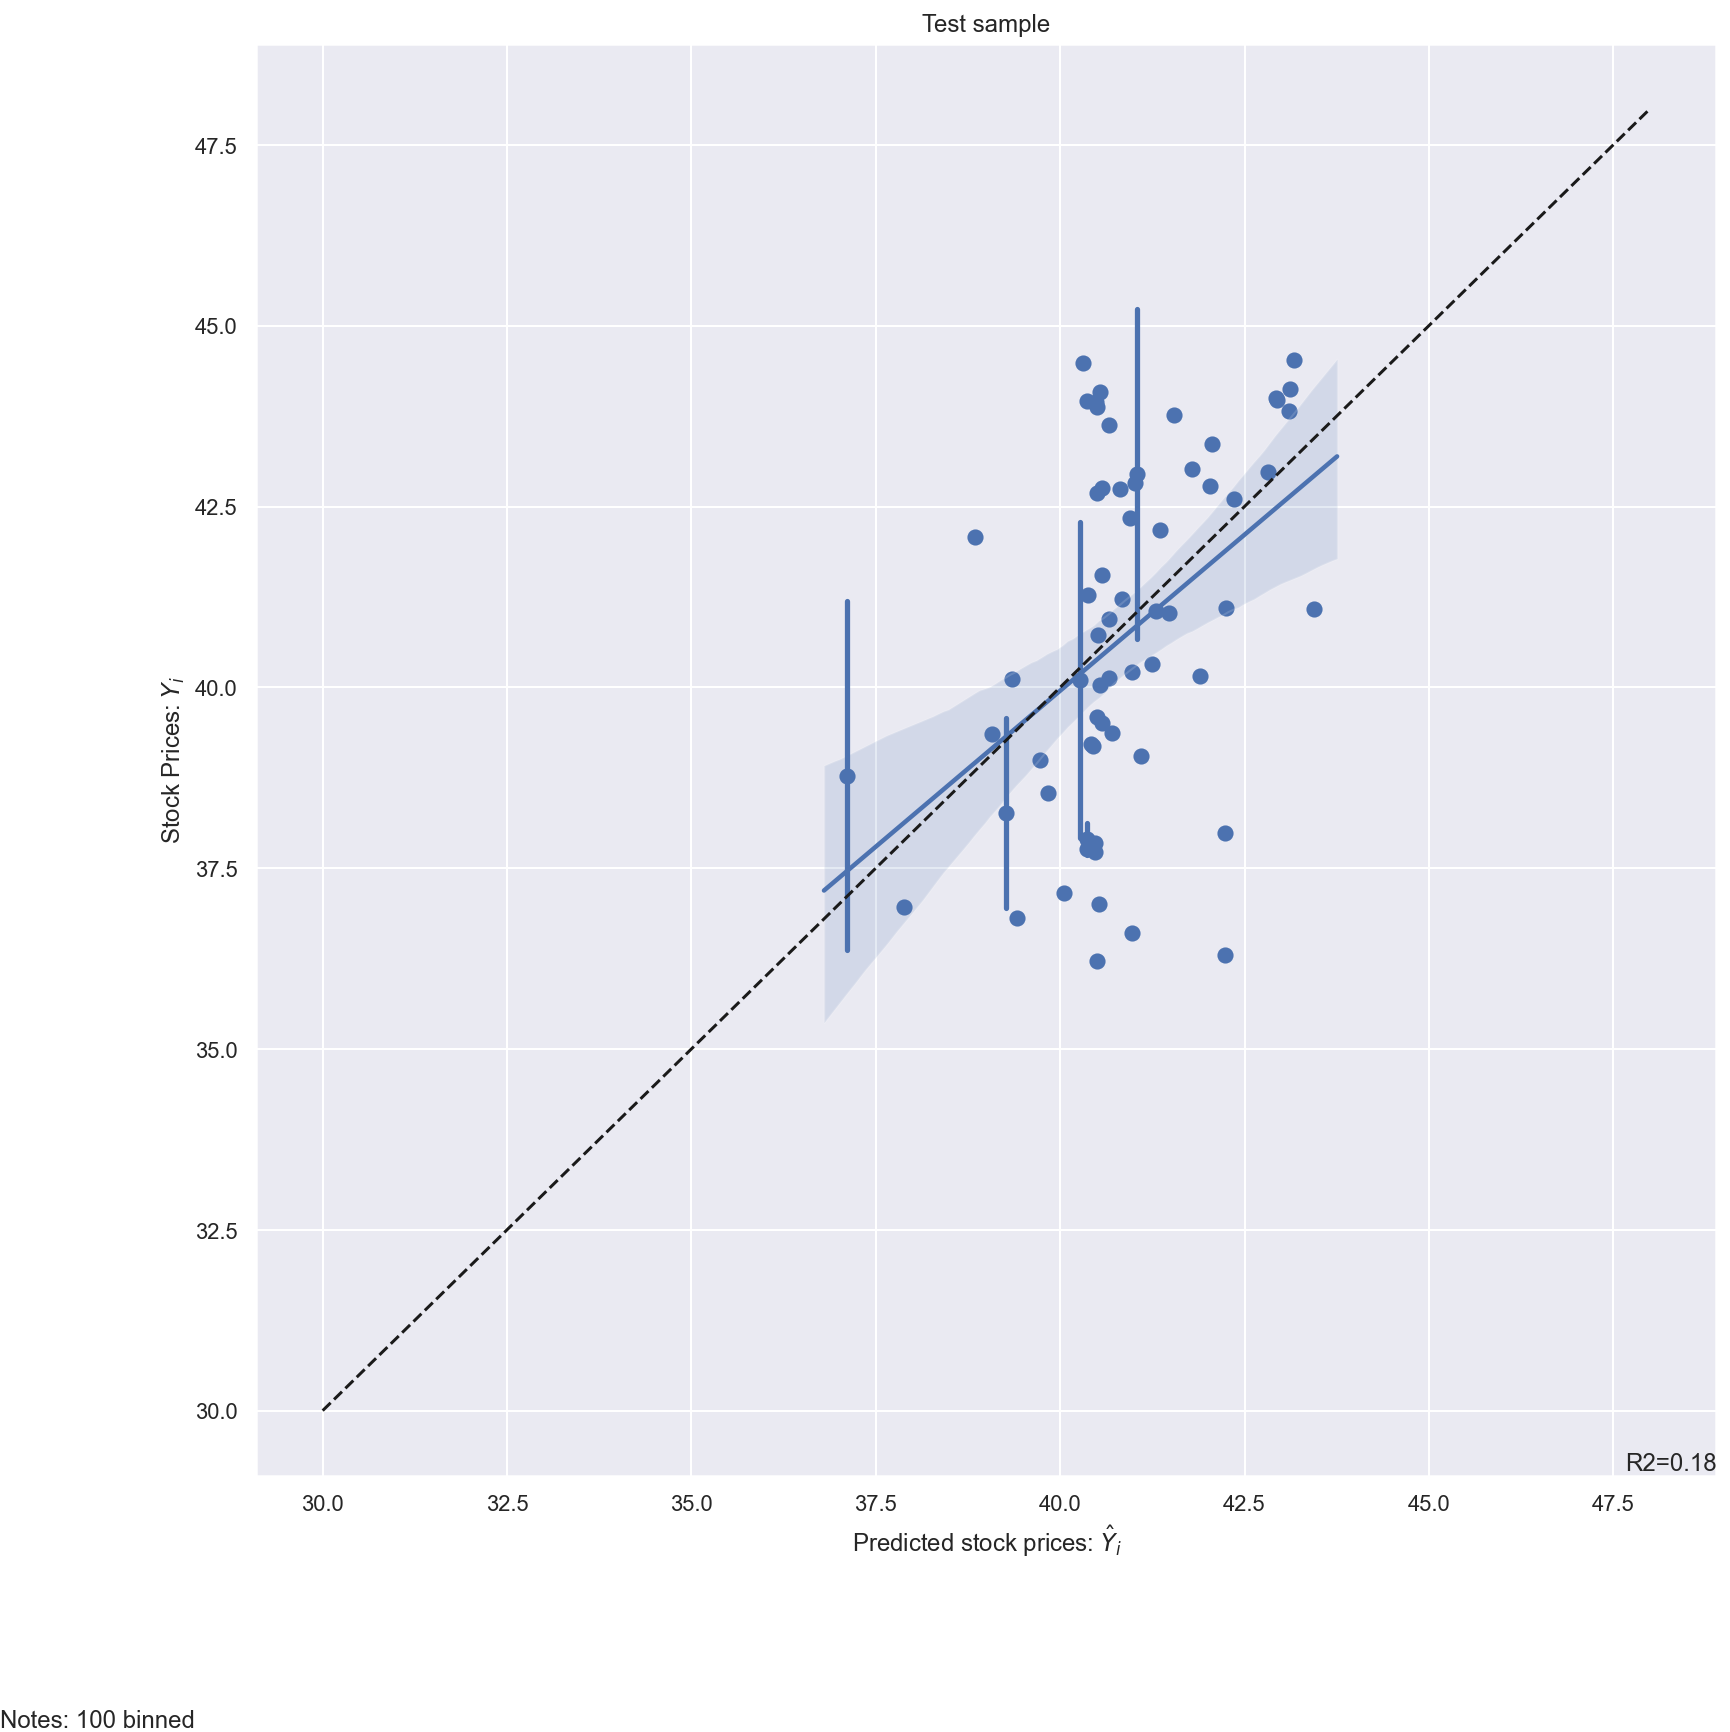

In [44]:
r2 = r2=round(r2_score(y_test, y_test_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

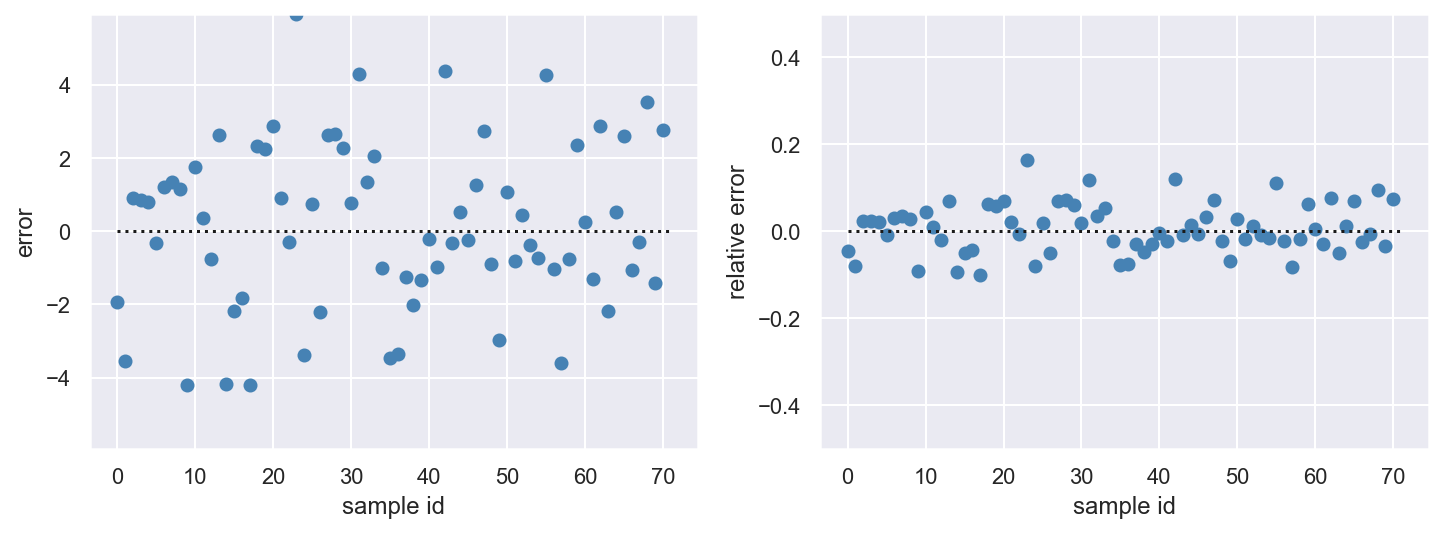

In [45]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test, y_test_pred)

Temporal splitting:

In [46]:
X_train2_poly=poly_features.fit_transform(X_train2)
X_test2_poly=poly_features.fit_transform(X_test2)

lin_reg = LinearRegression()
lin_reg.fit(X_train2_poly, y_train2)

y_test2_pred = lin_reg.predict(X_test2_poly)
test_rmse = mean_squared_error(y_test2,y_test2_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train2, y_train2_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test2, y_test2_pred), 2))

test RMS: 3.2344528313662977
train R2: 0.14
test R2: -12.96


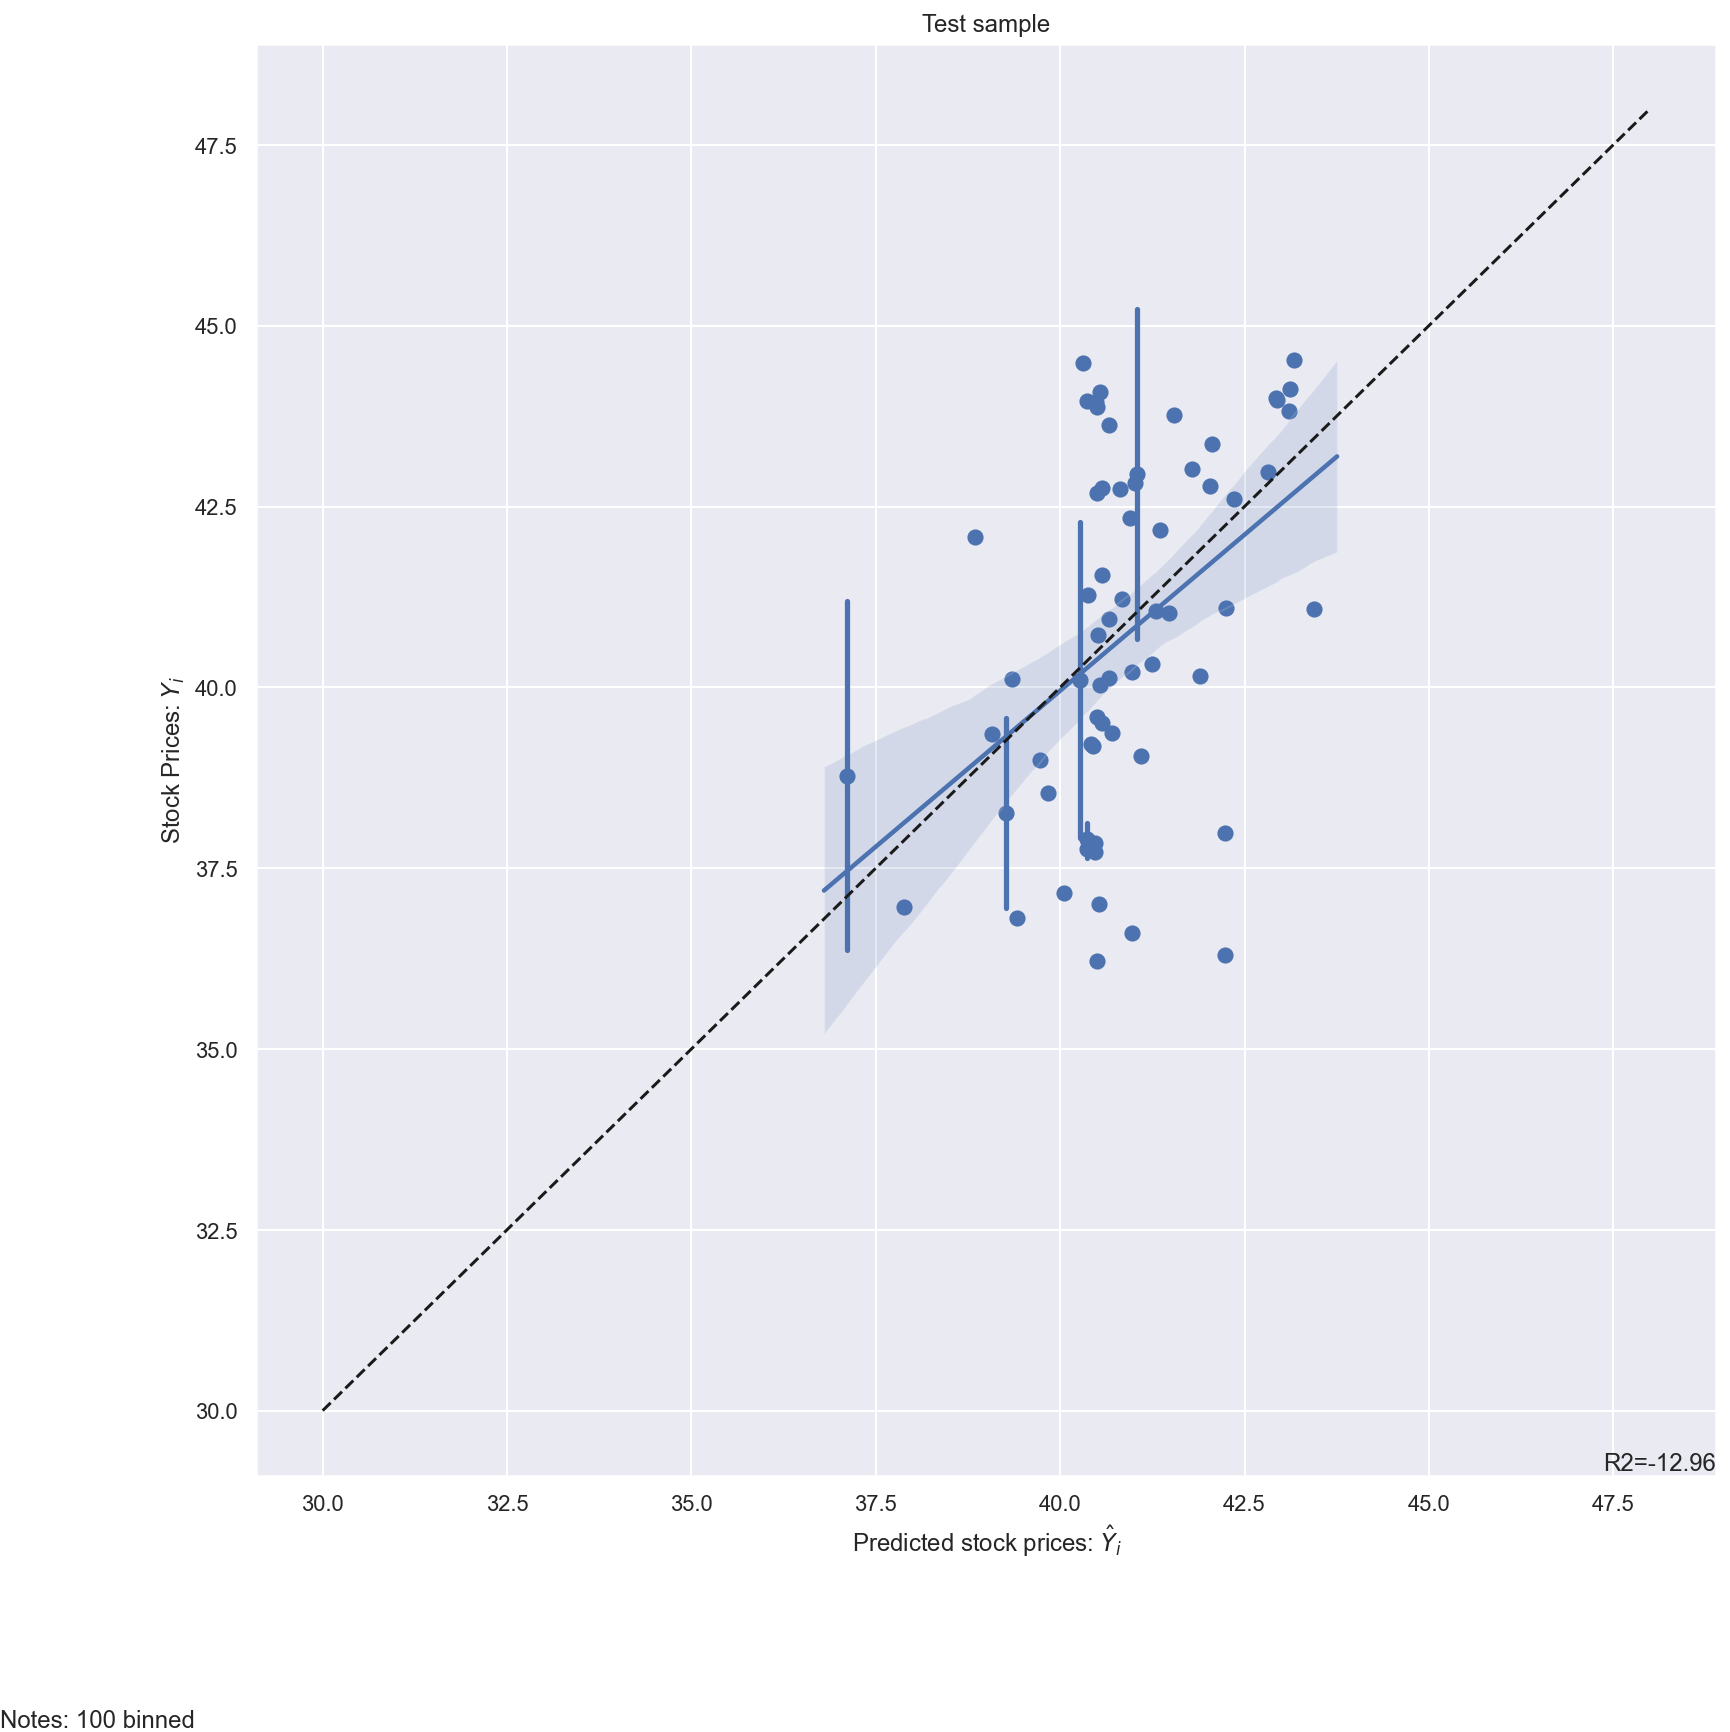

In [47]:
r2 = r2=round(r2_score(y_test2, y_test2_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

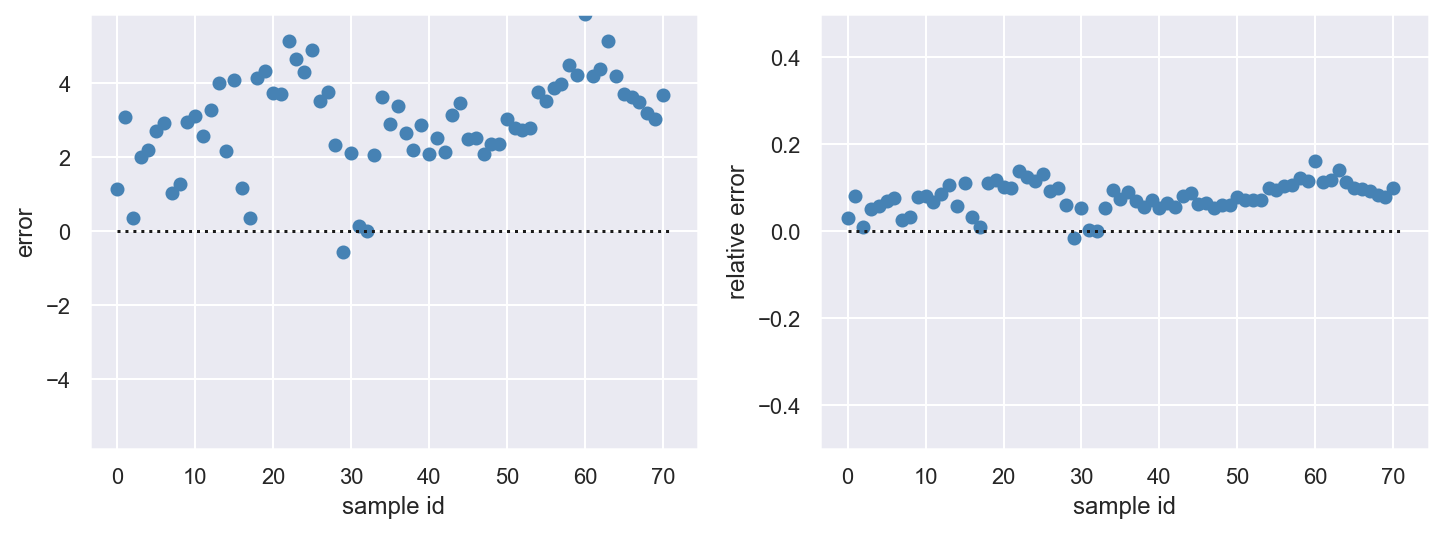

In [48]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test2, y_test2_pred)

#### Lasso regression:

In [49]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1) 

Randomized splitting:

In [50]:
lasso_reg.fit(X_train, y_train)
y_test_pred = lasso_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 2.45957467404268
train R2: 0.17
test R2: 0.04


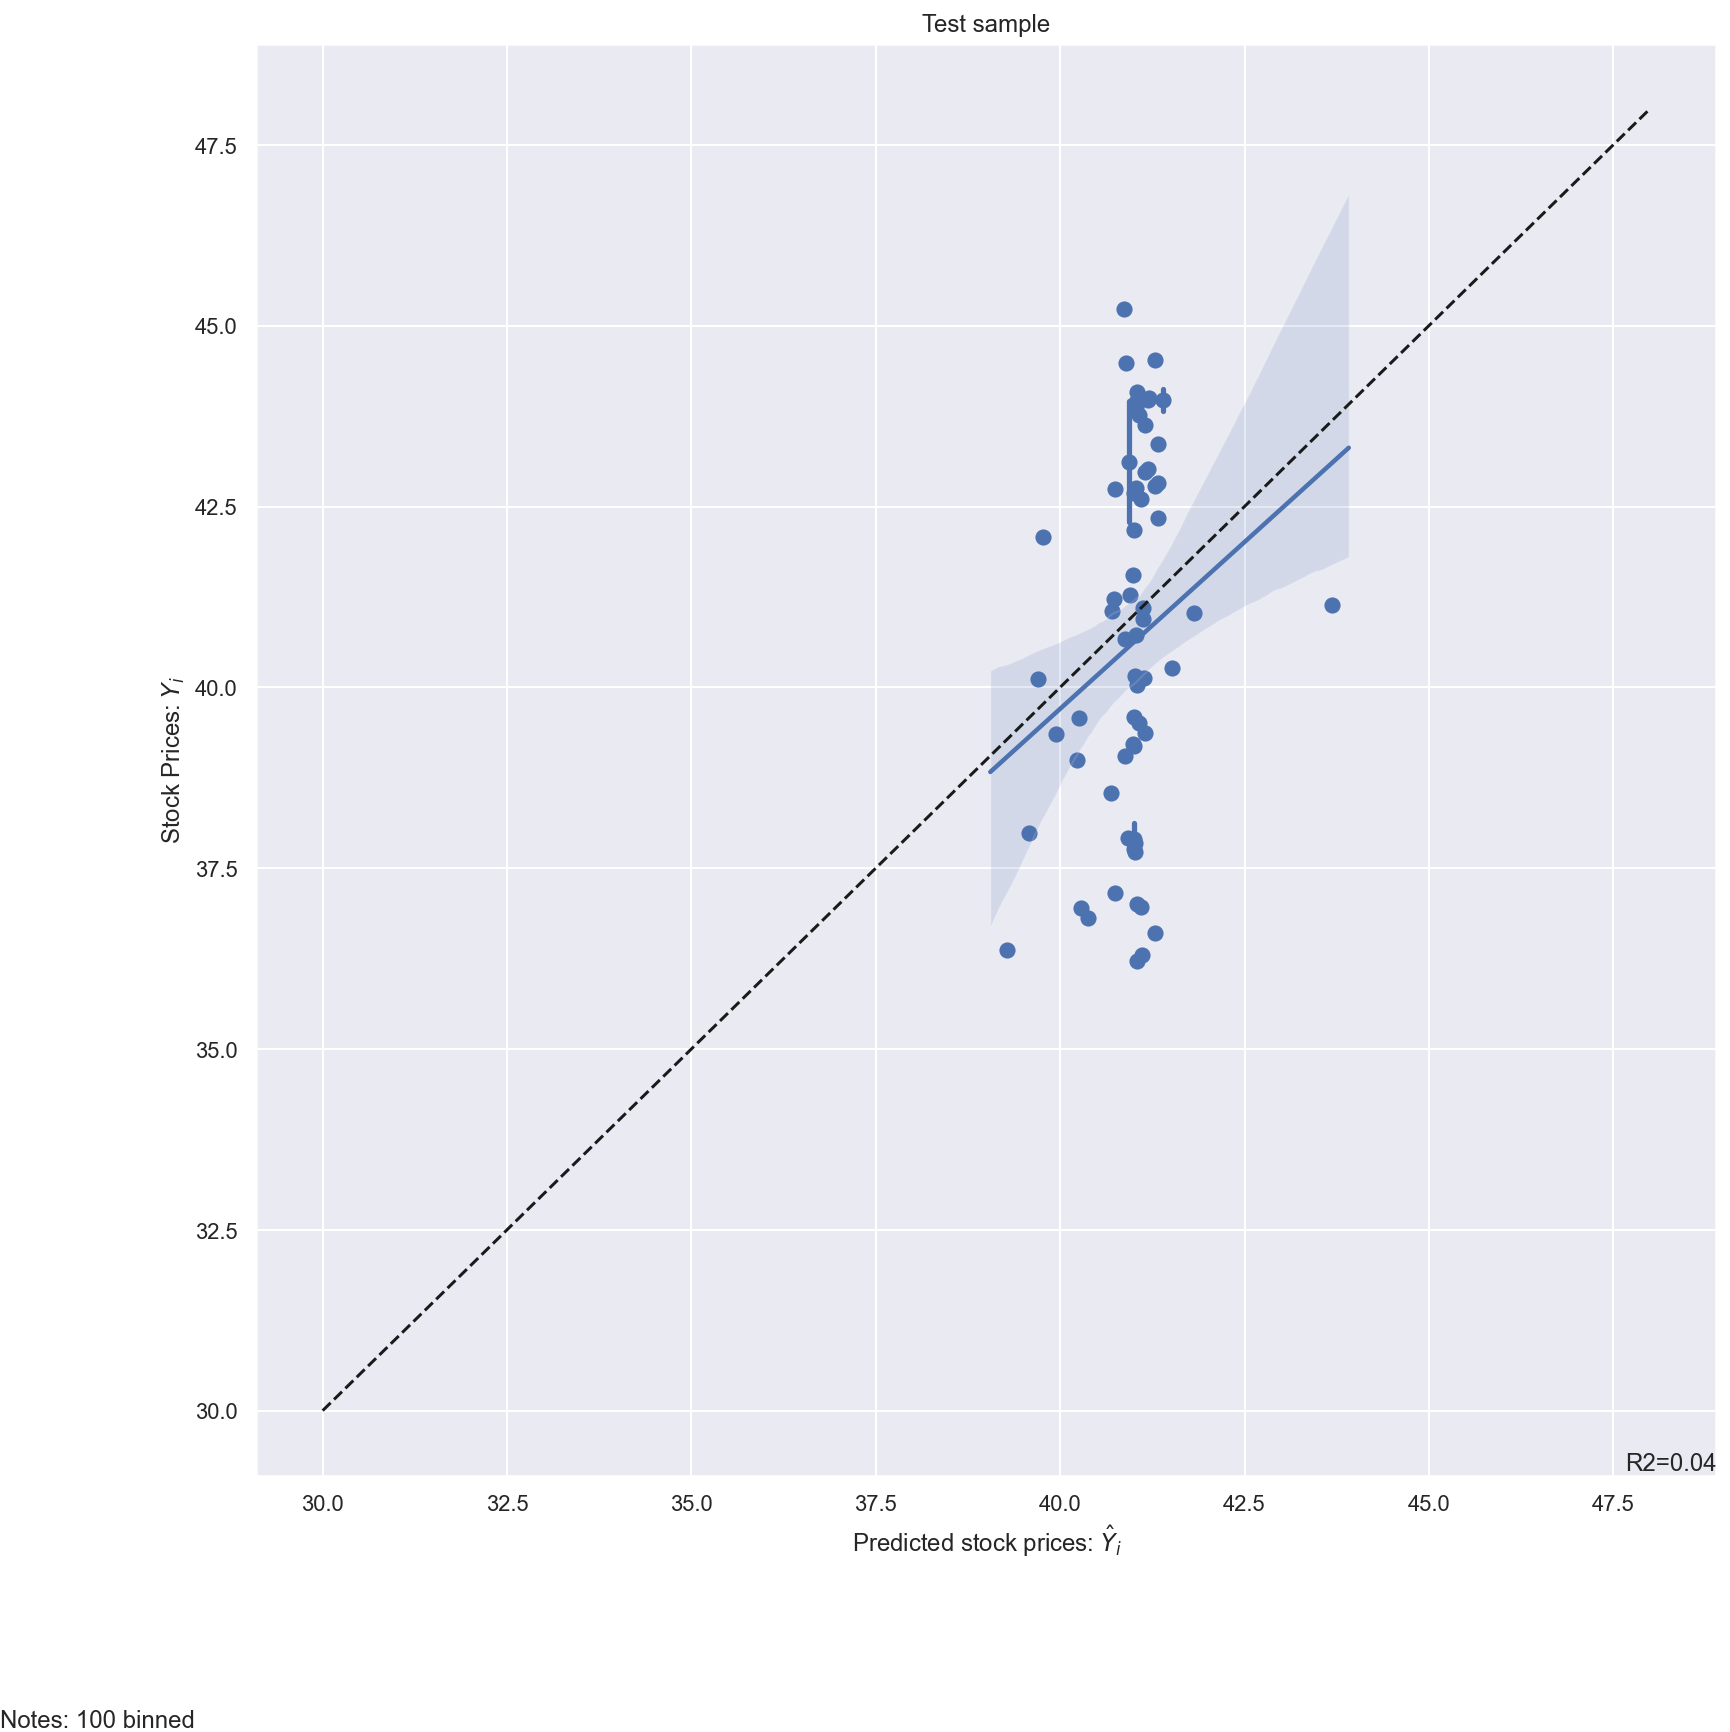

In [51]:
r2 = r2=round(r2_score(y_test, y_test_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

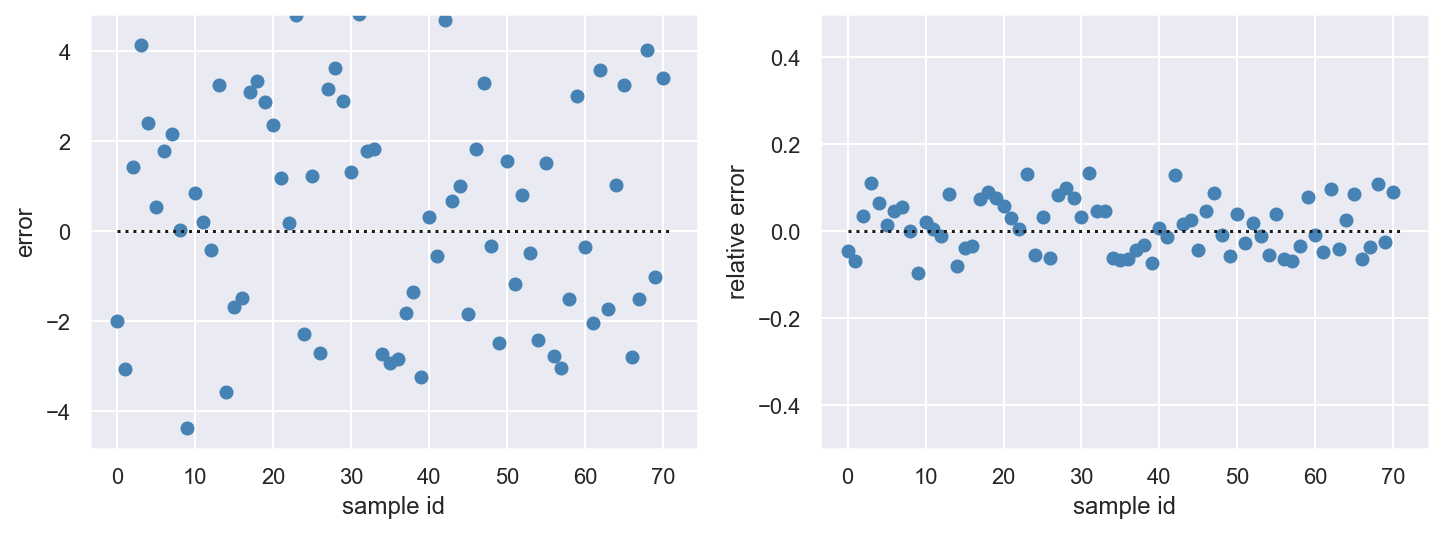

In [52]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test, y_test_pred)

Temporal splitting:

In [53]:
lasso_reg.fit(X_train2, y_train2)
y_test_pred = lasso_reg.predict(X_test2) 
test_rmse = mean_squared_error(y_test2,y_test2_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train2, y_train2_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test2, y_test2_pred), 2))

test RMS: 3.2344528313662977
train R2: 0.14
test R2: -12.96


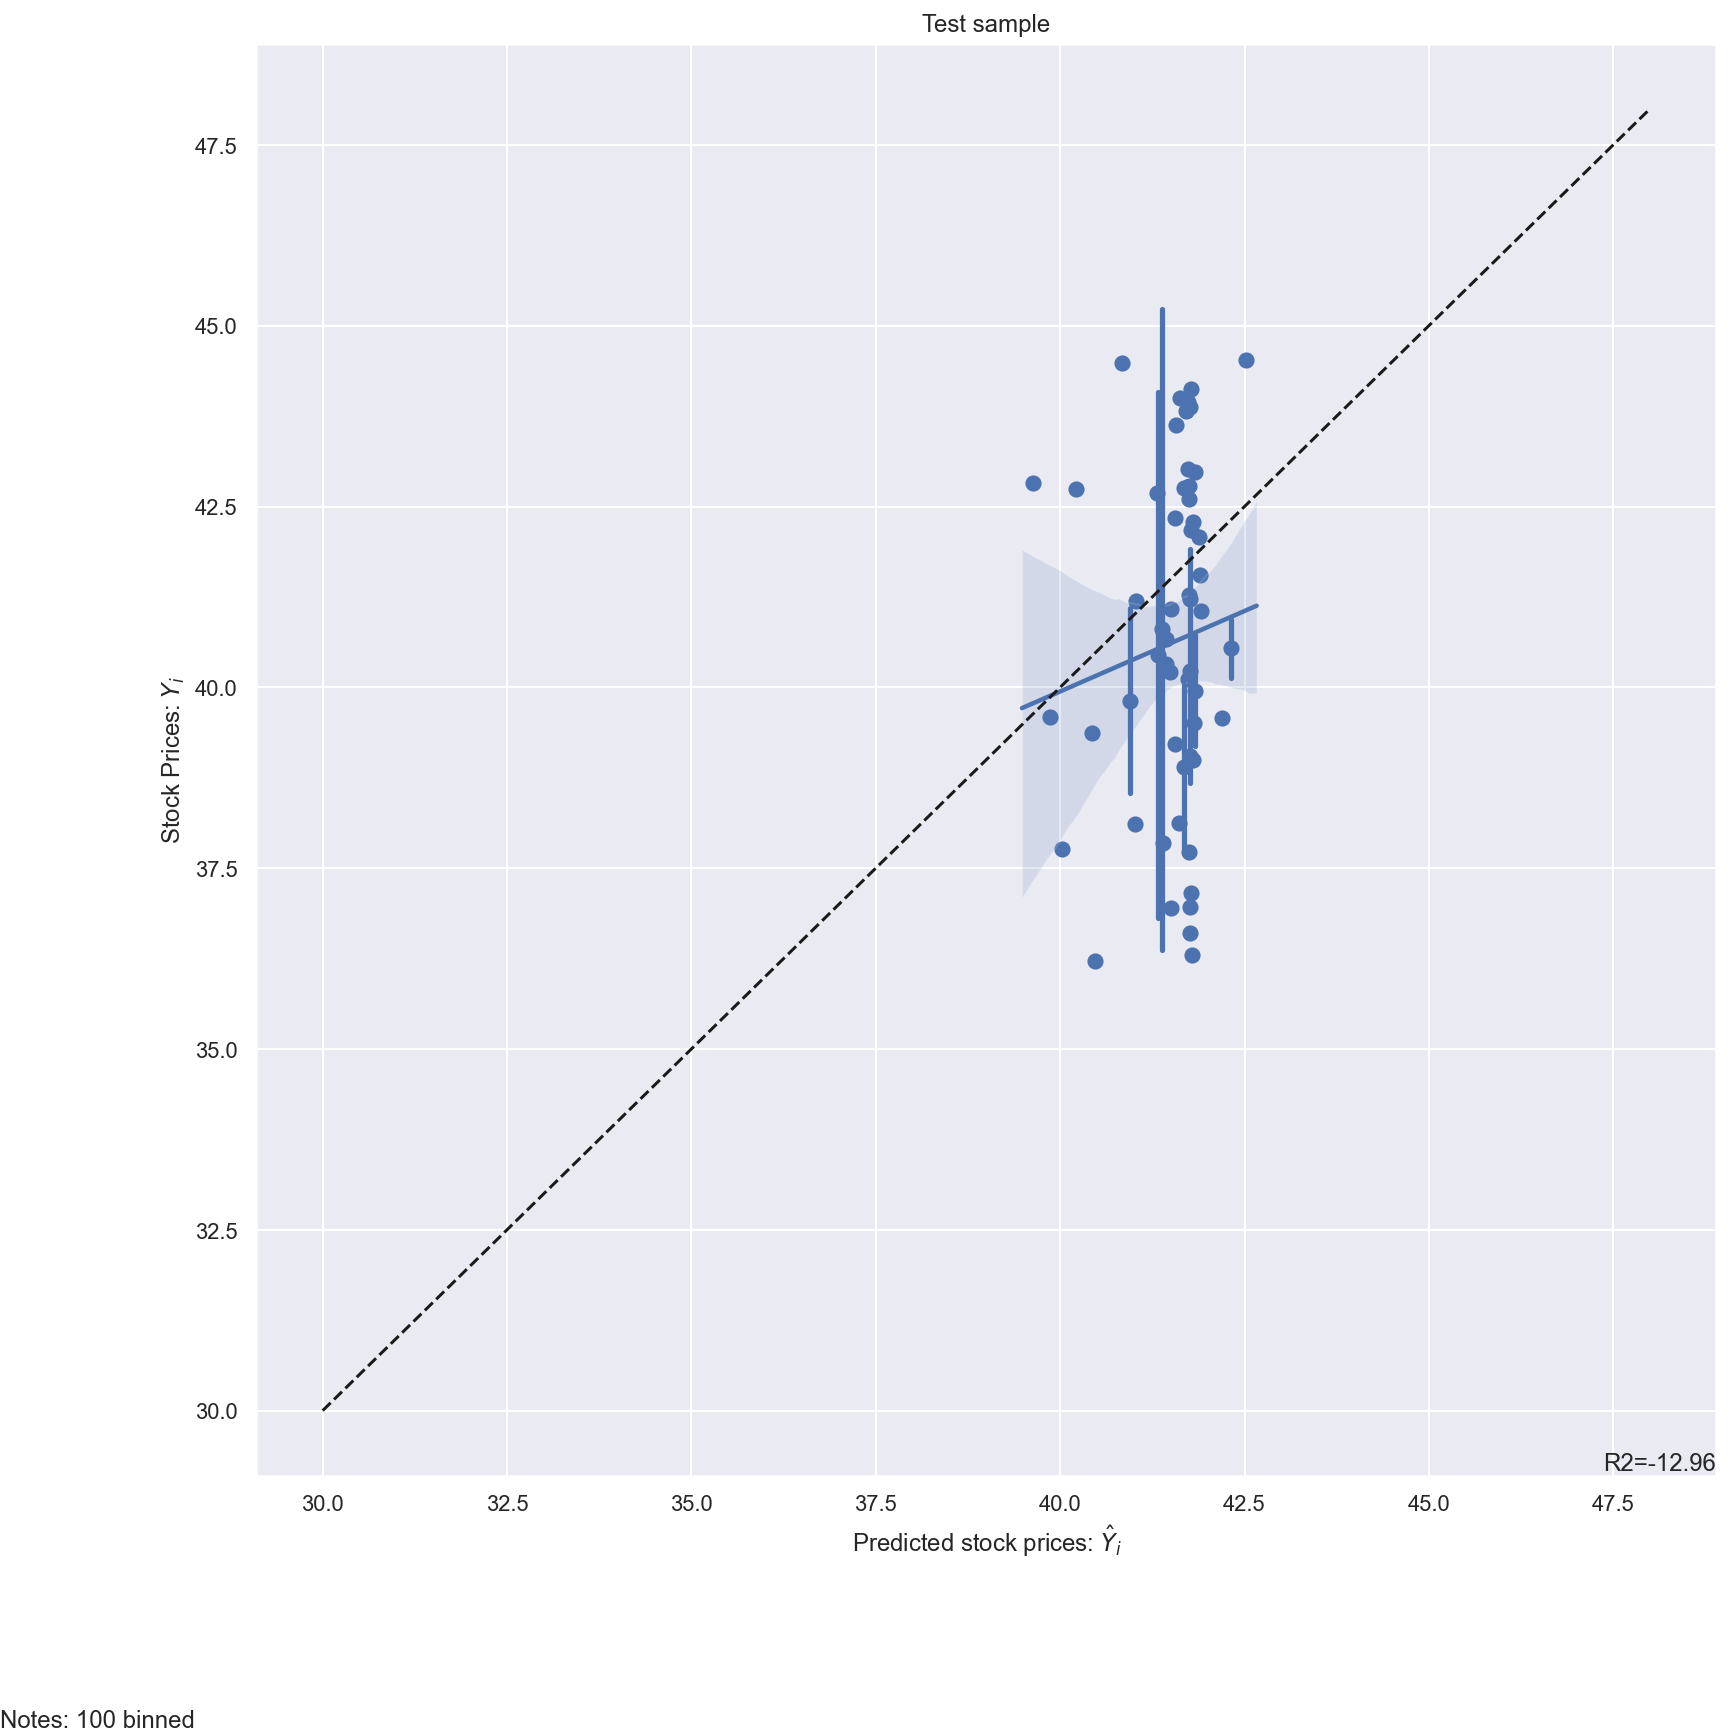

In [54]:
r2 = r2=round(r2_score(y_test2, y_test2_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

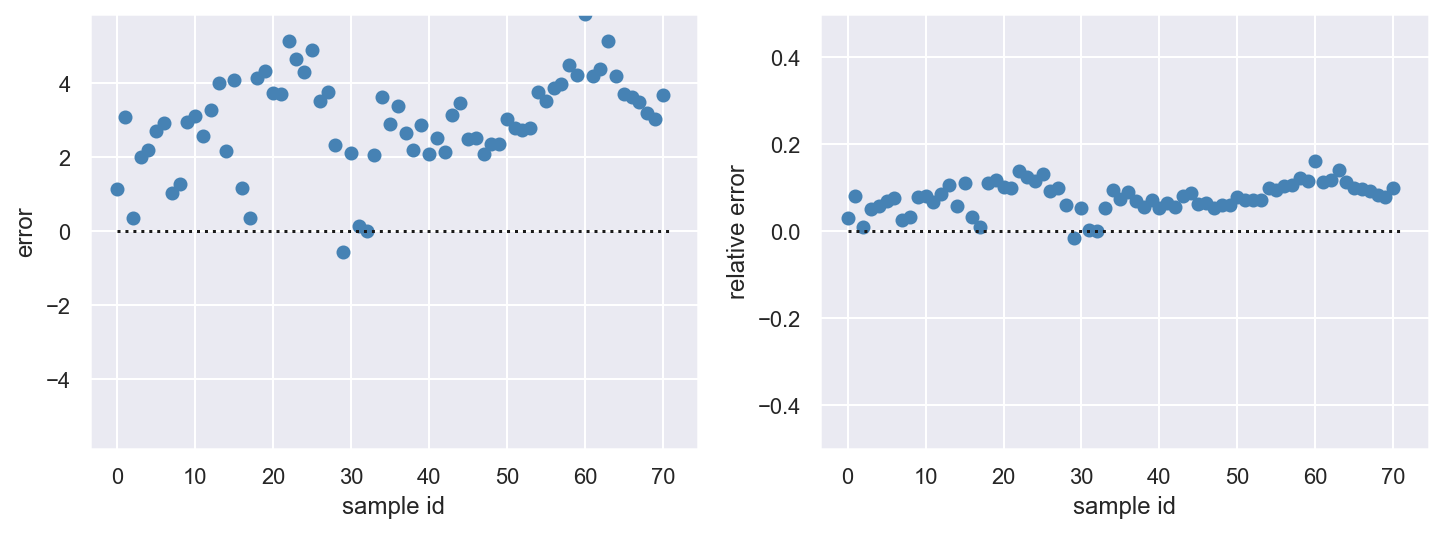

In [55]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test2, y_test2_pred)

#### Elastic Net

In [56]:
from sklearn.linear_model import ElasticNet
elanet_reg=ElasticNet(random_state=0)

Randomizes splitting:

In [57]:
elanet_reg.fit(X_train_scaled, y_train)

y_test_pred = elanet_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 2.441227087475359
train R2: 0.17
test R2: 0.05


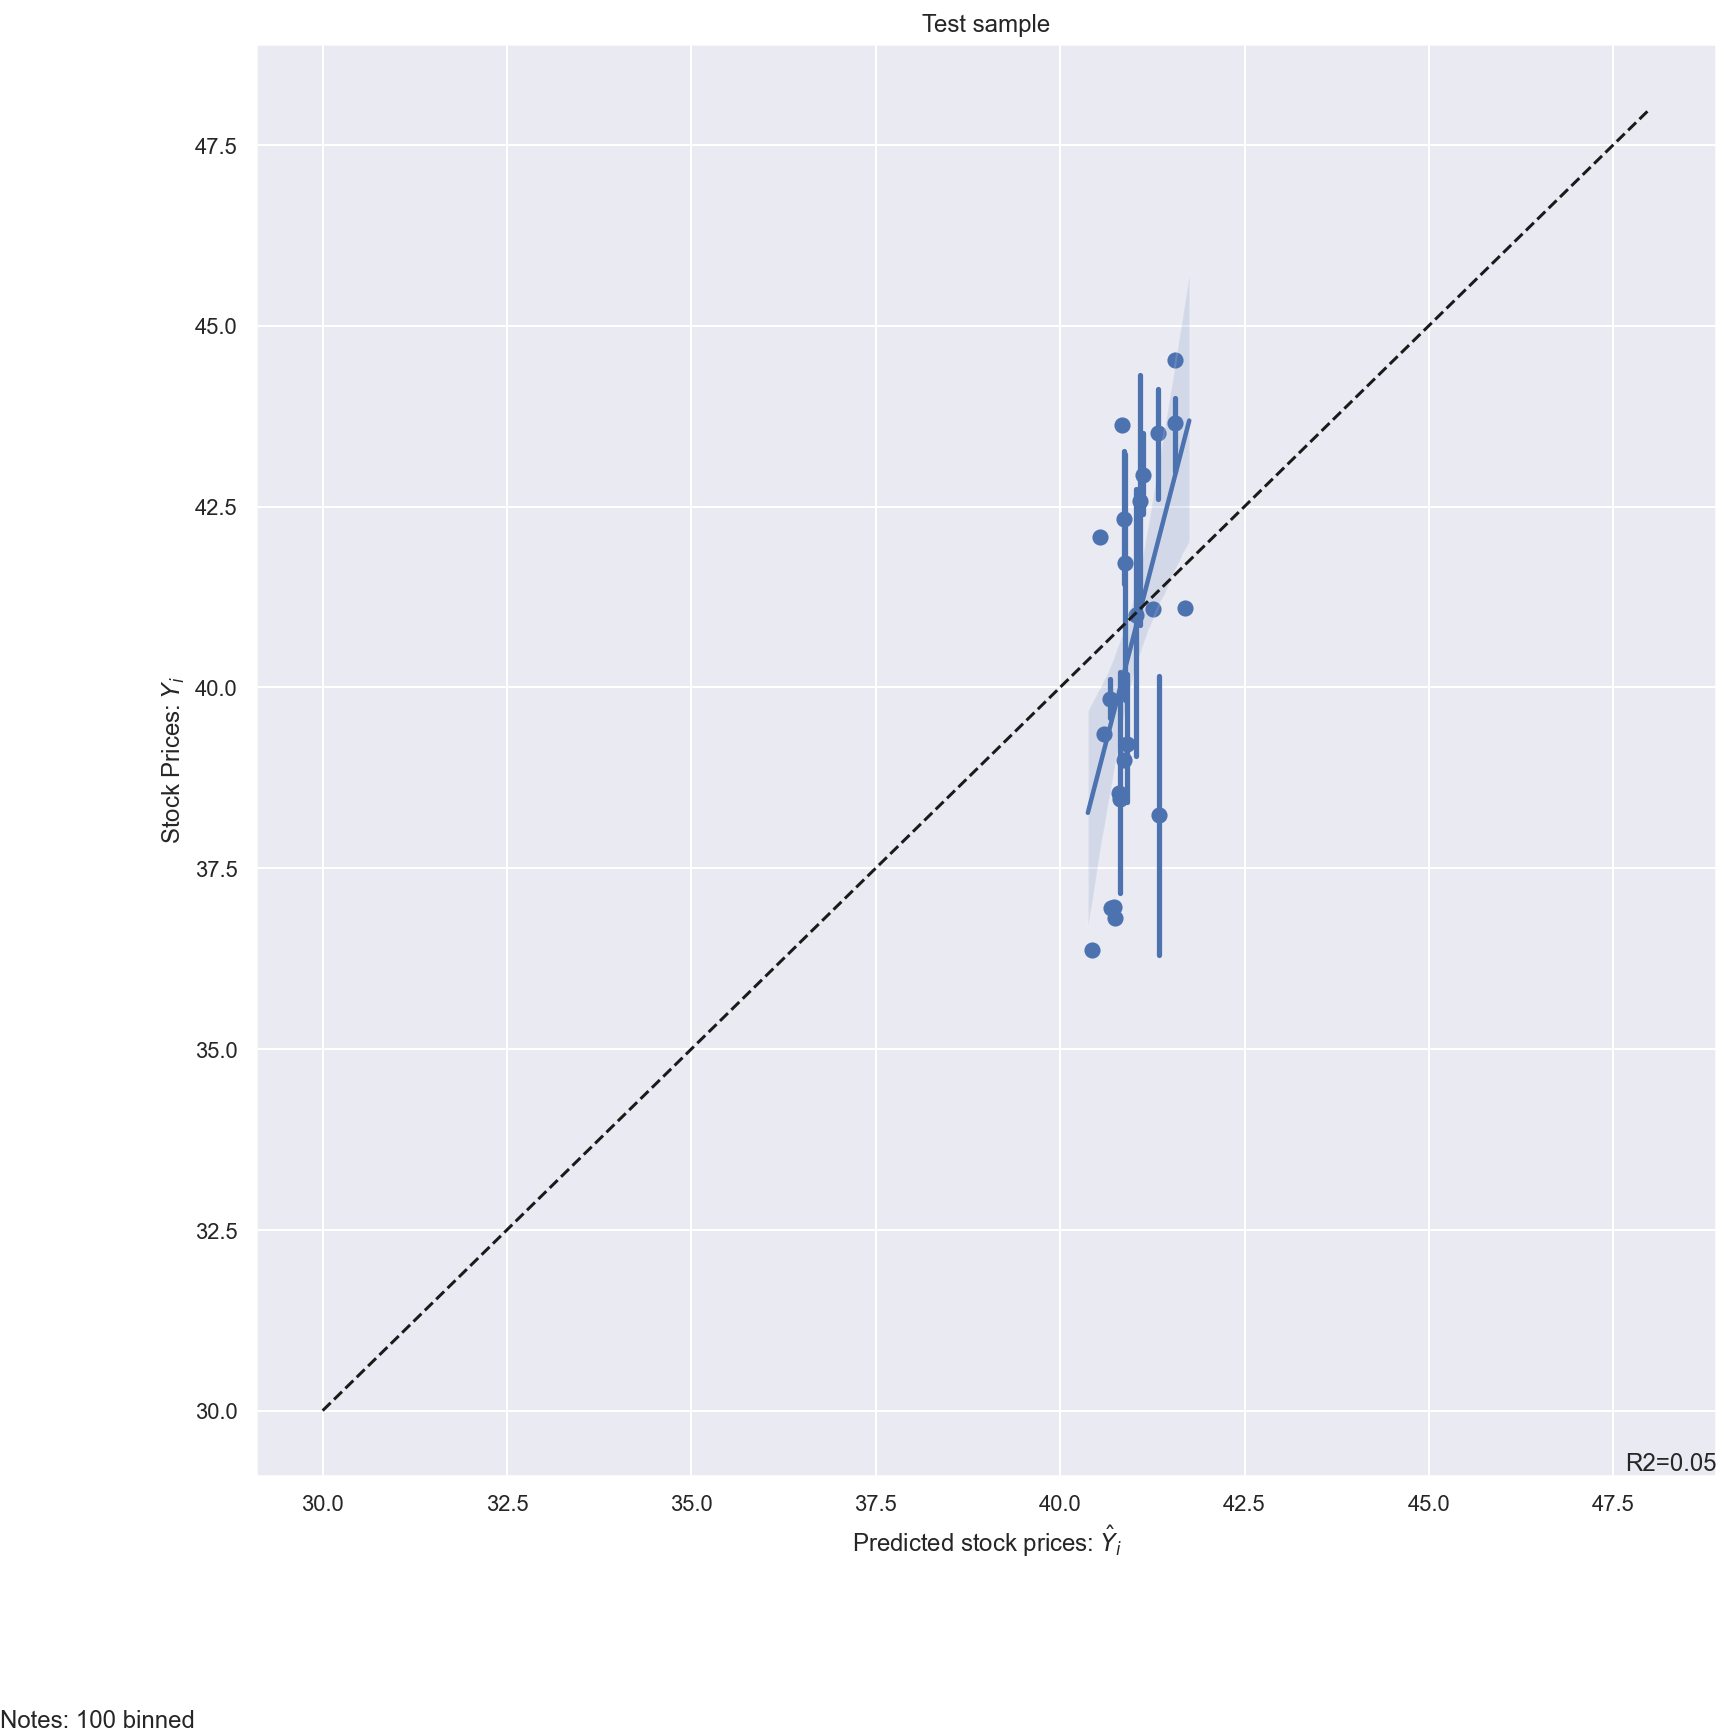

In [58]:
r2 = r2=round(r2_score(y_test, y_test_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

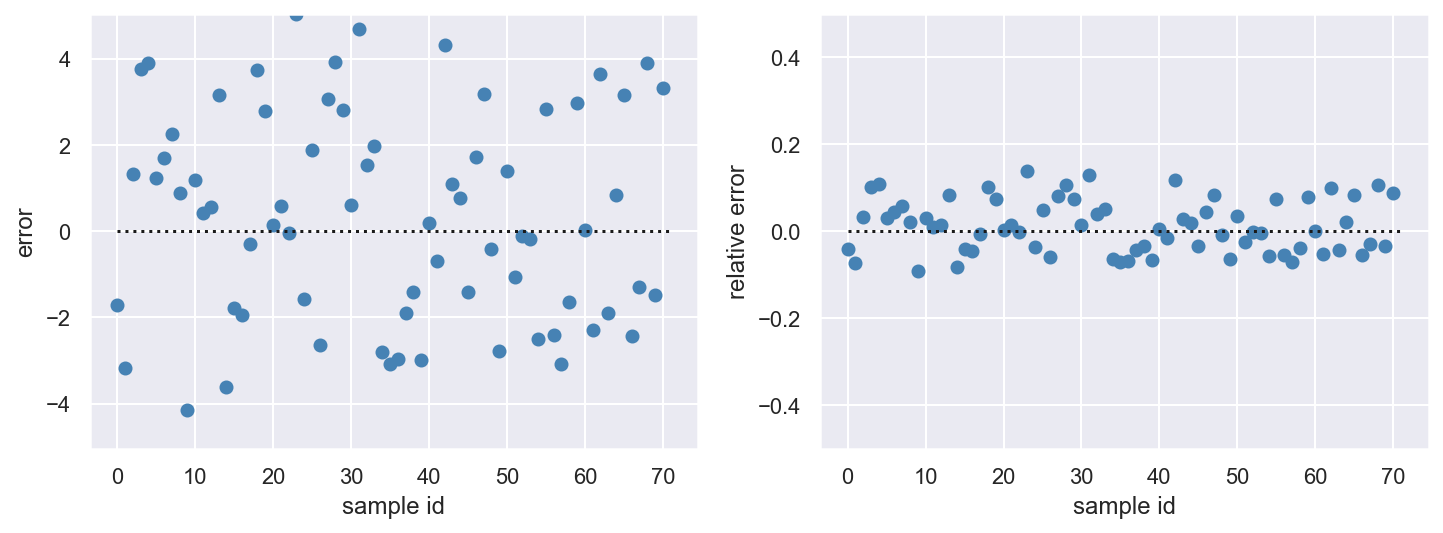

In [59]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test, y_test_pred)

Temporal splitting:

In [60]:
elanet_reg.fit(X_train2_scaled, y_train2)

y_test2_pred = elanet_reg.predict(X_test2_scaled)  

test_rmse = mean_squared_error(y_test2,y_test2_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train2, y_train2_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test2, y_test2_pred), 2))

test RMS: 3.6013939936283514
train R2: 0.14
test R2: -16.31


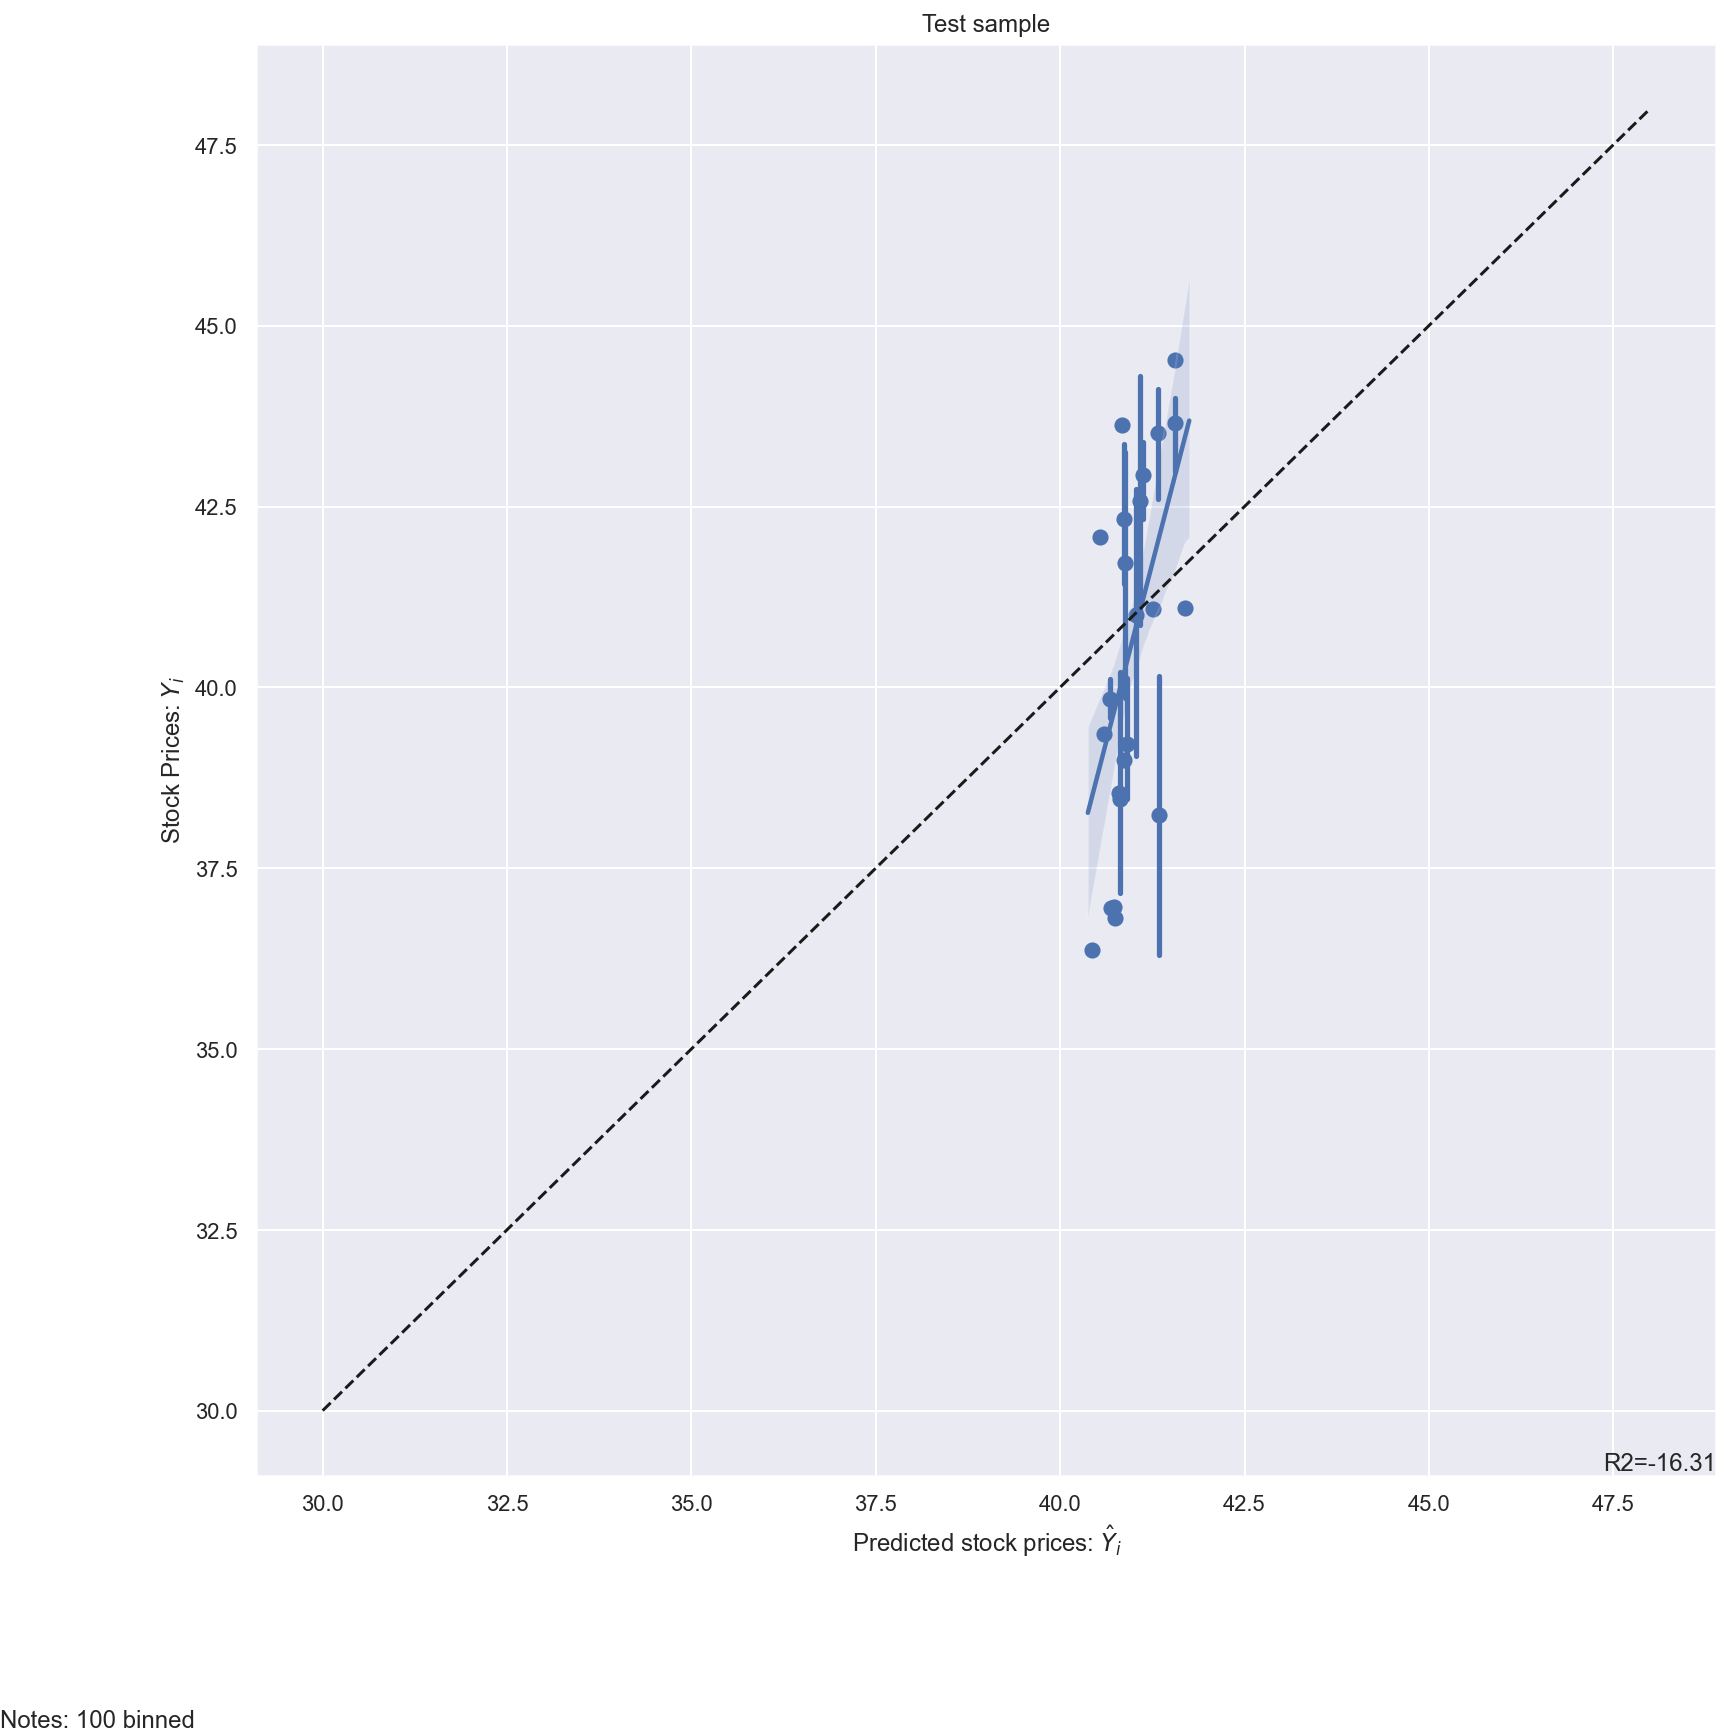

In [61]:
r2 = r2=round(r2_score(y_test2, y_test2_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted stock prices: $\hat{Y}_i$")
plt.ylabel("Stock Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

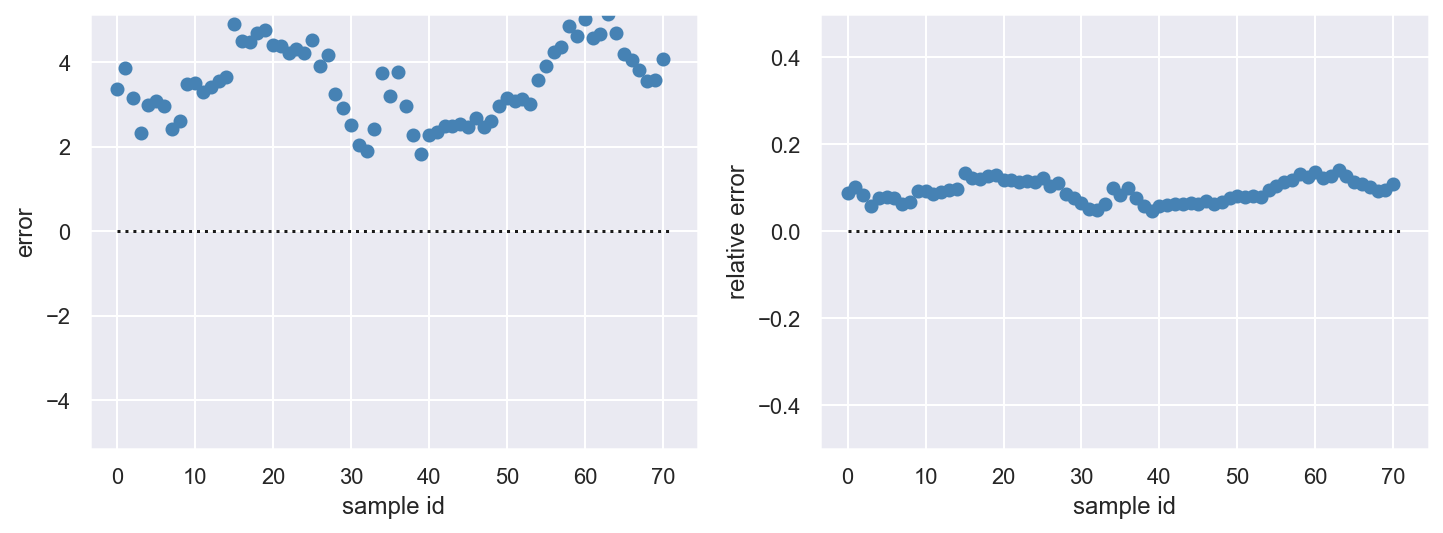

In [62]:
#Let us plot how good given and predicted values match on the training data set (code taken from the lecture Notebook W3)
plot_fit_quality(y_test2, y_test2_pred)

### Conclusion of used models:

In general, higher R2-scores are achieved when splitting the sample randomly than in a time series. The best overall performance (based on R2-scores) are achieved by using the polynomial and ridge regression.

**Now:** Fine-tune model for **randomized splitting** using the **ridge regression model**

### Fine-tuning of the Model
#### Model Evaluation using Cross-Validation


**Ridge regression:**

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; cross_val_score expect a utility function rather than a cost function: the scoring function is the opposite of the MSE. 
</div>

In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Perform 6-fold cross validation
scores = cross_val_score(ridge_reg, X_train, y_train, 
                         scoring="neg_mean_squared_error", cv=5)
scores

array([-5.28086852, -8.86107579, -6.20958069, -4.98208229, -5.01479757])

In [64]:
# Make cross validated predictions
y_train_pred_cv = cross_val_predict(ridge_reg, X_train, y_train, cv=5)

Plot:

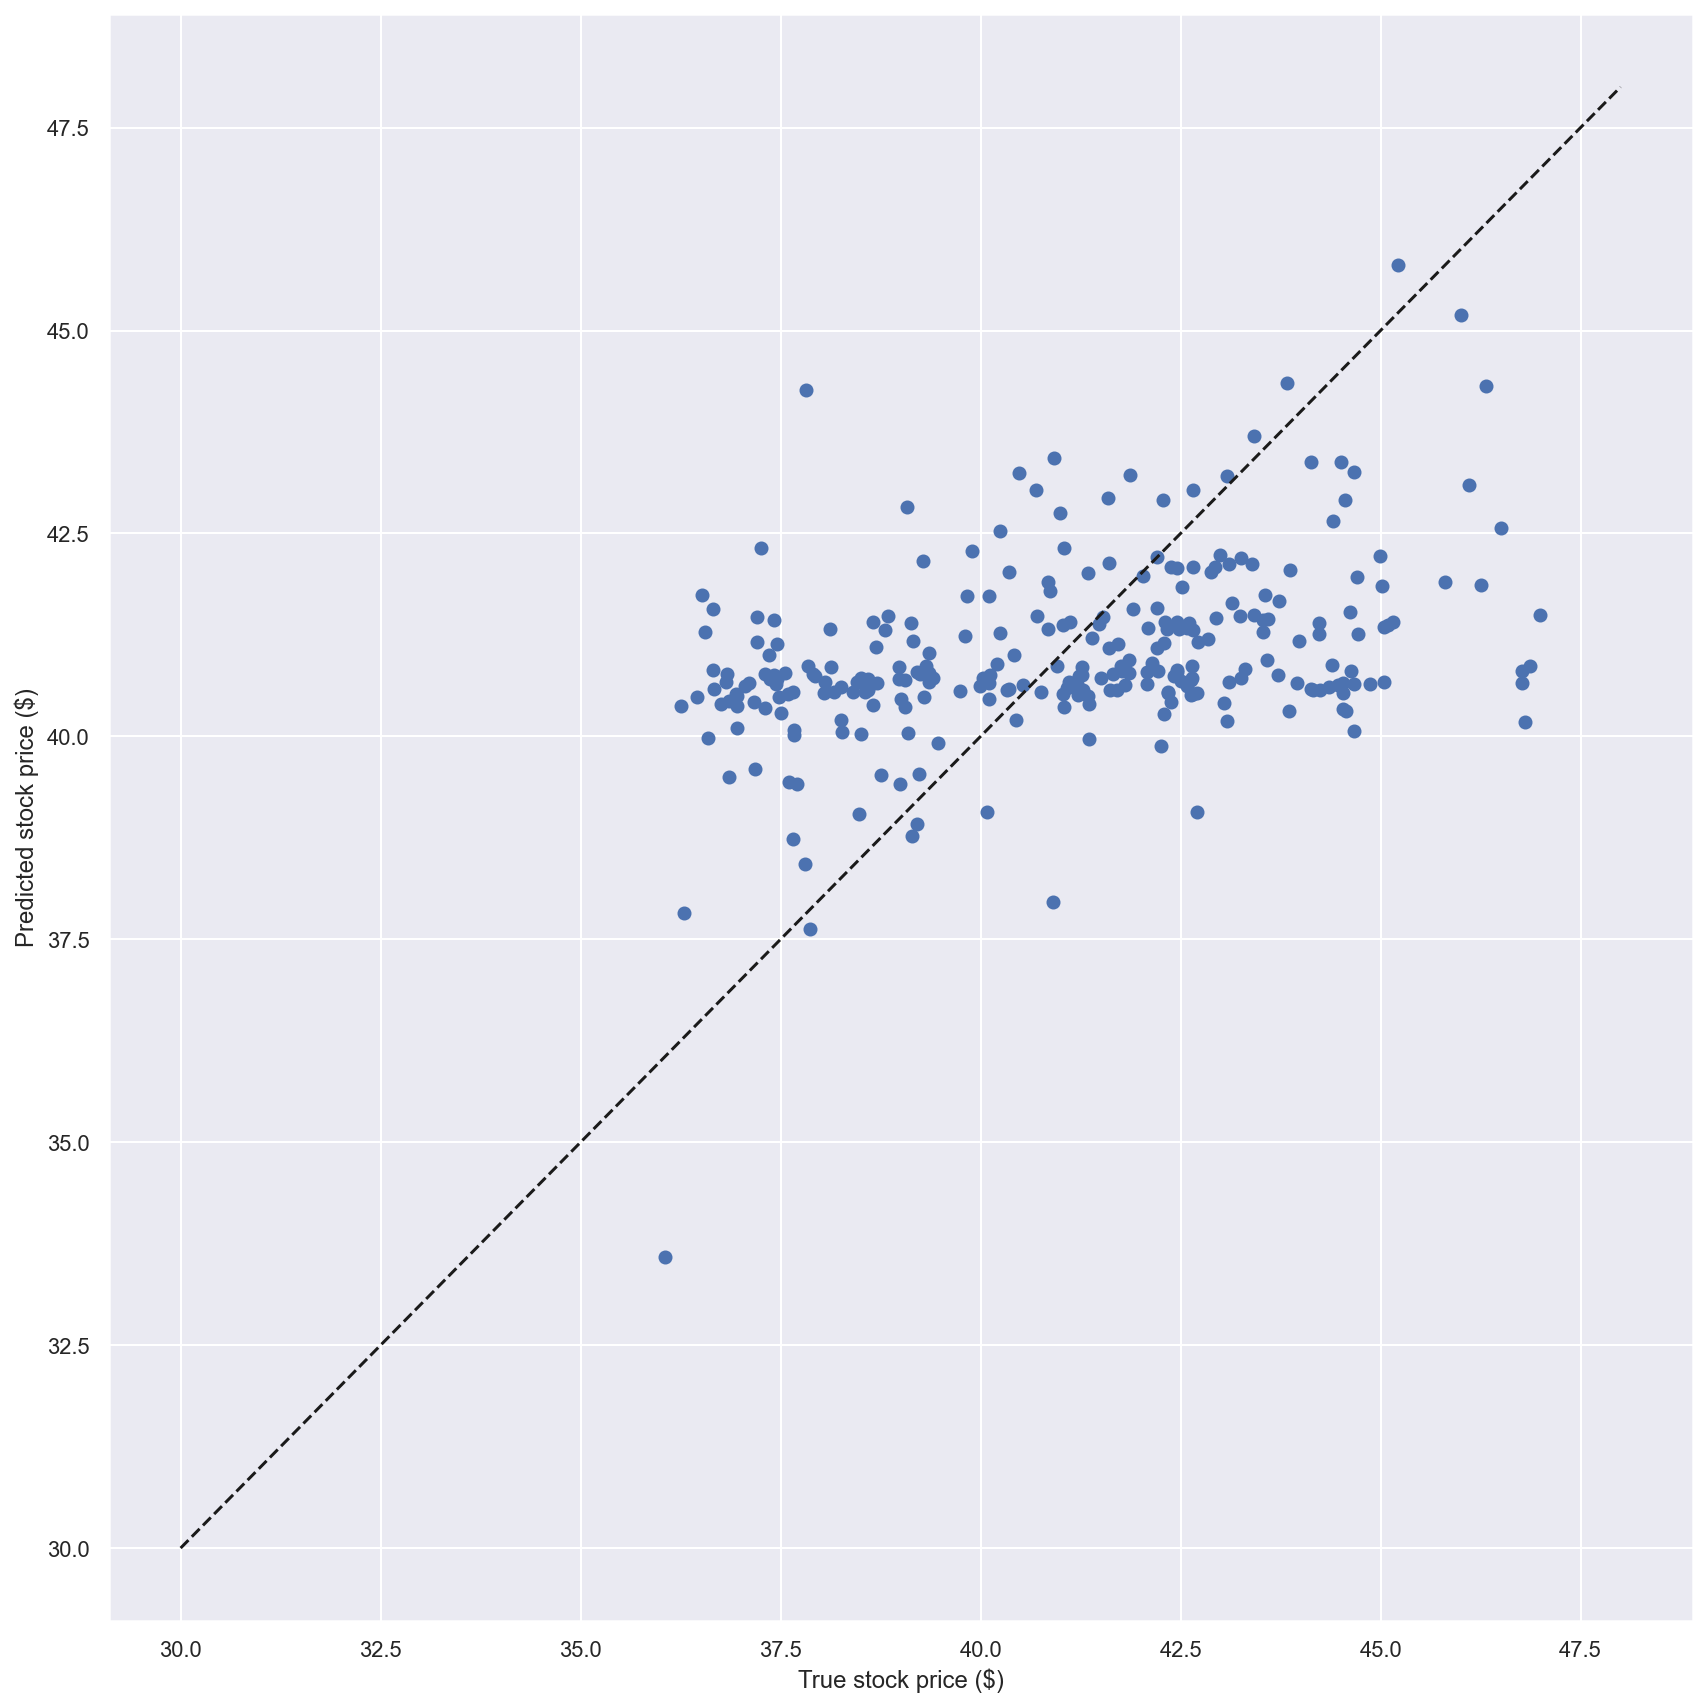

In [65]:
## Code taken from lecture
plt.scatter(y_train, y_train_pred_cv)
plt.plot([30, 48], [30, 48], '--k')
plt.axis('tight')
plt.xlabel('True stock price ($)')
plt.ylabel('Predicted stock price ($)')
plt.tight_layout()

In [66]:
accuracy =r2_score(y_train, y_train_pred_cv)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.15423875289995803


**Note:** cross-predicted accuracy is lower than without for the Ridge regression model!

**Hyperparameters tuning**

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1 ,1, 10]},
 ]
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

The best hyperparameter combination found:

In [68]:
grid_search.best_params_

{'alpha': 10}

In [69]:
grid_search.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Score of each hyperparameter combination tested during the grid search:

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.4651755719790125 {'alpha': 0.0001}
2.4651755139080866 {'alpha': 0.001}
2.4651749333776563 {'alpha': 0.01}
2.4651691459437064 {'alpha': 0.1}
2.4651130458824597 {'alpha': 1}
2.4647173975919796 {'alpha': 10}


In [71]:
df_cvres=pd.DataFrame(cvres)
df_cvres['mean_test_score_pos_sqrt']=df_cvres['mean_test_score'].apply(lambda x: np.sqrt(-x))
df_cvres['log_param_alpha']=df_cvres['param_alpha'].apply(lambda x: np.log(x))
df_cvres

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,mean_test_score_pos_sqrt,log_param_alpha
0,0.003995,0.002539,0.000799,0.001598,0.0001,{'alpha': 0.0001},-5.281564,-8.864003,-6.207490,-4.983205,...,6,-6.161478,-5.259132,-5.936889,-6.221961,-6.224831,-5.960858,0.366360,2.465176,-9.210340
1,0.002401,0.001961,0.000000,0.000000,0.001,{'alpha': 0.001},-5.281564,-8.864001,-6.207492,-4.983204,...,5,-6.161478,-5.259132,-5.936889,-6.221961,-6.224831,-5.960858,0.366360,2.465176,-6.907755
2,0.001600,0.001959,0.000799,0.001598,0.01,{'alpha': 0.01},-5.281557,-8.863974,-6.207511,-4.983194,...,4,-6.161478,-5.259132,-5.936889,-6.221961,-6.224831,-5.960858,0.366360,2.465175,-4.605170
3,0.002403,0.001962,0.001591,0.001949,0.1,{'alpha': 0.1},-5.281494,-8.863708,-6.207700,-4.983092,...,3,-6.161478,-5.259132,-5.936889,-6.221961,-6.224831,-5.960858,0.366360,2.465169,-2.302585
4,0.003196,0.001598,0.000000,0.000000,1,{'alpha': 1},-5.280869,-8.861076,-6.209581,-4.982082,...,2,-6.161486,-5.259142,-5.936894,-6.221969,-6.224837,-5.960866,0.366359,2.465113,0.000000
5,0.002397,0.001957,0.000000,0.000000,10,{'alpha': 10},-5.275610,-8.837151,-6.228098,-4.972888,...,1,-6.162230,-5.260076,-5.937383,-6.222694,-6.225392,-5.961555,0.366260,2.464717,2.302585


Text(0, 0.5, 'Avg. mean test score')

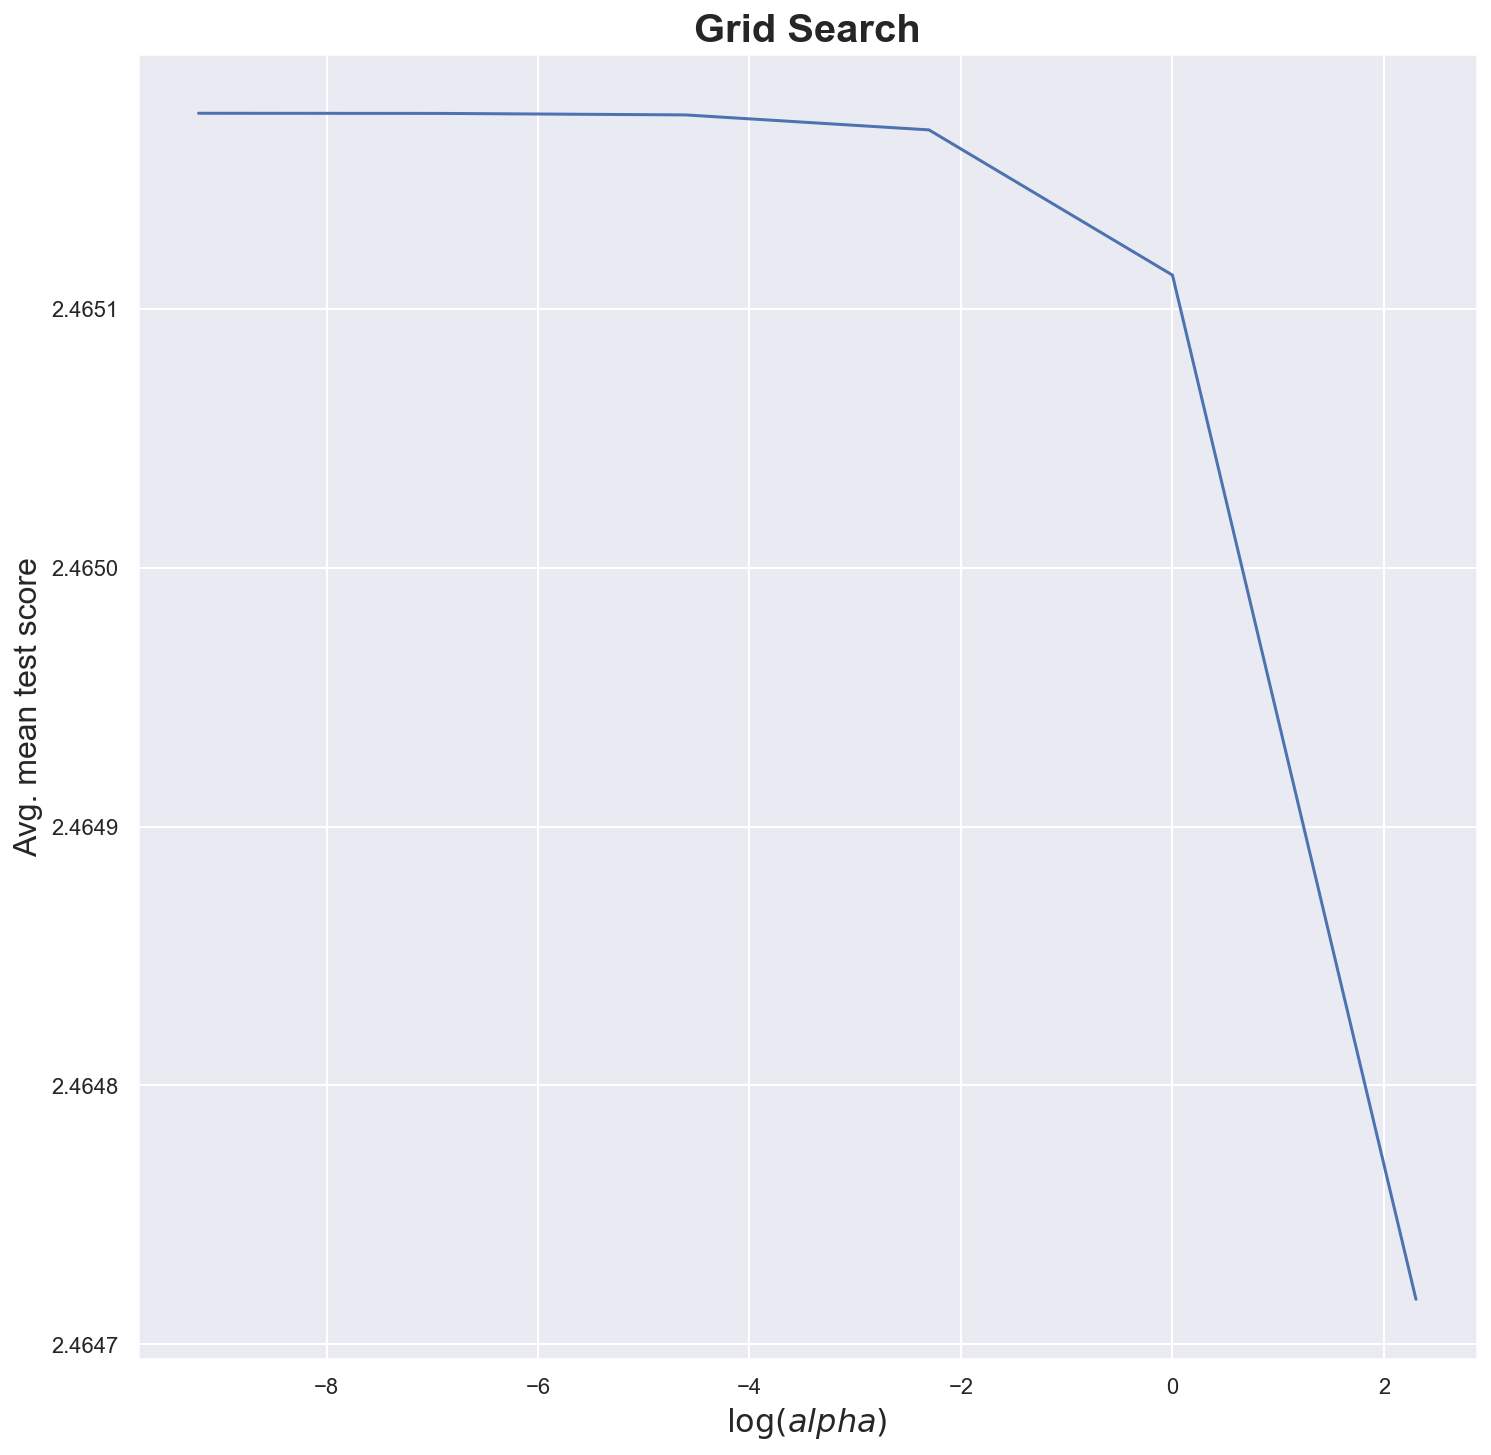

In [72]:
_, ax = plt.subplots(1,1)
plt.plot(df_cvres["log_param_alpha"], df_cvres["mean_test_score_pos_sqrt"])
ax.set_title("Grid Search", fontsize=20, fontweight='bold')
ax.set_xlabel("$\log (alpha)$", fontsize=16)
ax.set_ylabel('Avg. mean test score', fontsize=16)

**Best alpha found to be 10, lets re-run the model using the best alpha:**

In [73]:
ridge_reg=Ridge(alpha=10) # set alpha to 10 a       
ridge_reg.fit(X_train, y_train)

y_train_pred=ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 4)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 4)) 

train RMS: 48.205986435742126
test RMS: 2.302640863580339
train R2: 0.1687
test R2: 0.1589


No improvement by using alpha = 10 